In [11]:
import pandas as pd
from TSB_AD.model_wrapper import run_Unsupervise_AD
from TSB_AD.evaluation.metrics import get_metrics

# Specify Anomaly Detector to use and data directory
AD_Name = 'IForest'   # It can be replaced with any anomaly detector availale in TSB-AD
data_direc = 'TSB-AD-M/TSB-AD-M/001_Genesis_id_1_Sensor_tr_4055_1st_15538.csv'

# Loading Data
df = pd.read_csv(data_direc).dropna()
data = df.iloc[:, 0:-1].values.astype(float)
label = df['Label'].astype(int).to_numpy()

# Applying Anomaly Detector
# output = run_Unsupervise_AD(AD_Name, data)

# # Evaluation
# evaluation_result = get_metrics(output, label)
# print(evaluation_result) 
  


In [12]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
from chronos import BaseChronosPipeline, Chronos2Pipeline
print(torch.cuda.is_available())

True


In [13]:
Directorty = 'TSB-AD-M/TSB-AD-M/'
datasets = []
for filename in os.listdir(Directorty):
    if filename.endswith('.csv'):
        df = pd.read_csv(os.path.join(Directorty, filename))
        datasets.append(df)
    

In [14]:
set1 = datasets[1]
display(set1)

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,Label
0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1823,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1824,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1825,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [15]:
# Inspect dataset structure
print("Number of datasets loaded:", len(datasets))
print("\nFirst dataset info:")
print("Columns:", datasets[0].columns.tolist())
print("Shape:", datasets[0].shape)
print("\nData types:")
print(datasets[0].dtypes)
print("\nFirst few rows:")
datasets[0].head()

Number of datasets loaded: 200

First dataset info:
Columns: ['MotorData.ActCurrent', 'MotorData.ActPosition', 'MotorData.ActSpeed', 'MotorData.IsAcceleration', 'MotorData.IsForce', 'MotorData.Motor_Pos1reached', 'MotorData.Motor_Pos2reached', 'MotorData.Motor_Pos3reached', 'MotorData.Motor_Pos4reached', 'NVL_Recv_Ind.GL_Metall', 'NVL_Recv_Ind.GL_NonMetall', 'NVL_Recv_Storage.GL_I_ProcessStarted', 'NVL_Recv_Storage.GL_I_Slider_IN', 'NVL_Recv_Storage.GL_I_Slider_OUT', 'NVL_Recv_Storage.GL_LightBarrier', 'NVL_Send_Storage.ActivateStorage', 'PLC_PRG.Gripper', 'PLC_PRG.MaterialIsMetal', 'Label']
Shape: (16220, 19)

Data types:
MotorData.ActCurrent                    int64
MotorData.ActPosition                   int64
MotorData.ActSpeed                      int64
MotorData.IsAcceleration                int64
MotorData.IsForce                       int64
MotorData.Motor_Pos1reached             int64
MotorData.Motor_Pos2reached             int64
MotorData.Motor_Pos3reached             int64
M

,MotorData.ActCurrent,MotorData.ActPosition,MotorData.ActSpeed,MotorData.IsAcceleration,MotorData.IsForce,MotorData.Motor_Pos1reached,MotorData.Motor_Pos2reached,MotorData.Motor_Pos3reached,MotorData.Motor_Pos4reached,NVL_Recv_Ind.GL_Metall,NVL_Recv_Ind.GL_NonMetall,NVL_Recv_Storage.GL_I_ProcessStarted,NVL_Recv_Storage.GL_I_Slider_IN,NVL_Recv_Storage.GL_I_Slider_OUT,NVL_Recv_Storage.GL_LightBarrier,NVL_Send_Storage.ActivateStorage,PLC_PRG.Gripper,PLC_PRG.MaterialIsMetal,Label
0,-5,268975,0,0,-1,0,0,0,0,0,1,0,1,0,1,0,0,0,0
1,0,268975,0,0,-1,0,0,0,0,0,1,0,1,0,1,0,0,0,0
2,-5,268975,0,0,-3,0,0,0,0,0,1,0,1,0,1,0,0,0,0
3,0,268975,0,0,4,0,0,0,0,0,1,0,1,0,1,0,0,0,0
4,0,268975,0,0,4,0,0,0,0,0,1,0,1,0,1,0,0,0,0


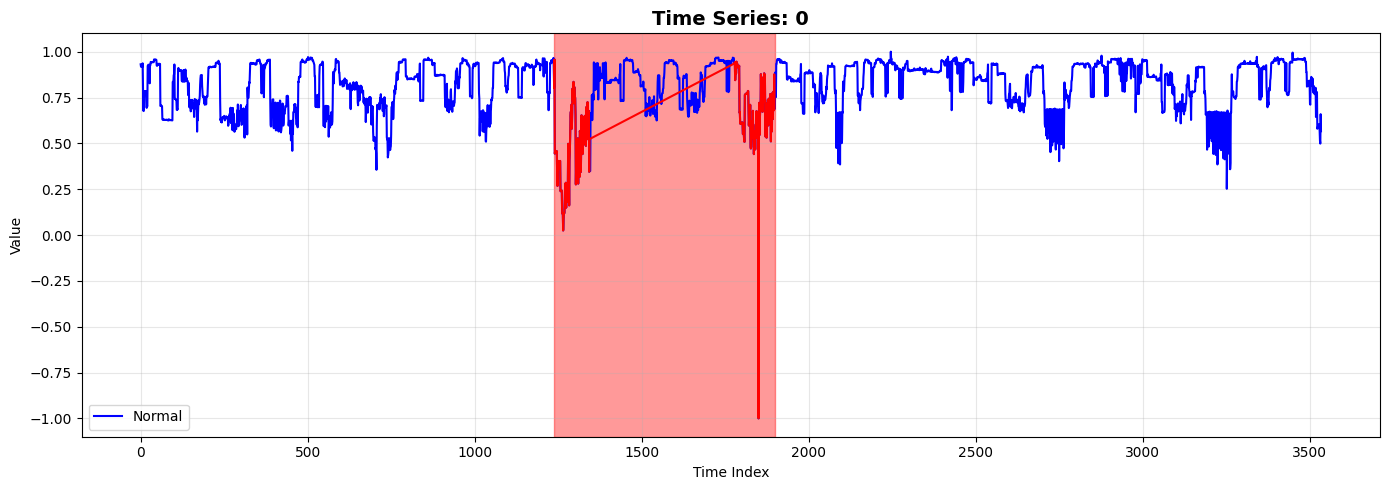

✓ Column: 0 | Shape: (3535,) | Anomalies: 228


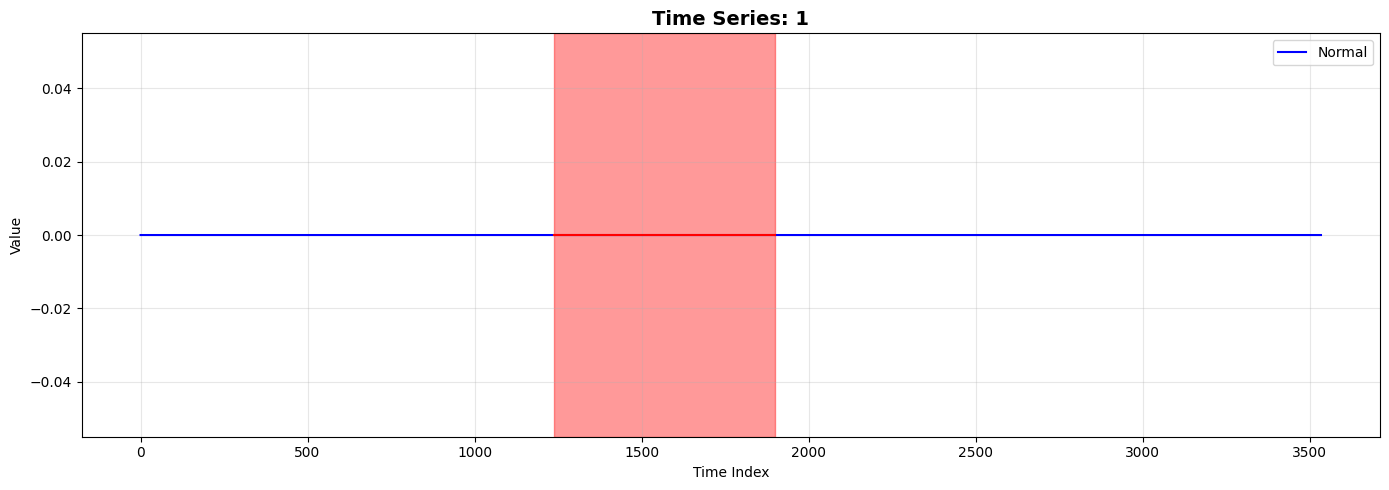

✓ Column: 1 | Shape: (3535,) | Anomalies: 228


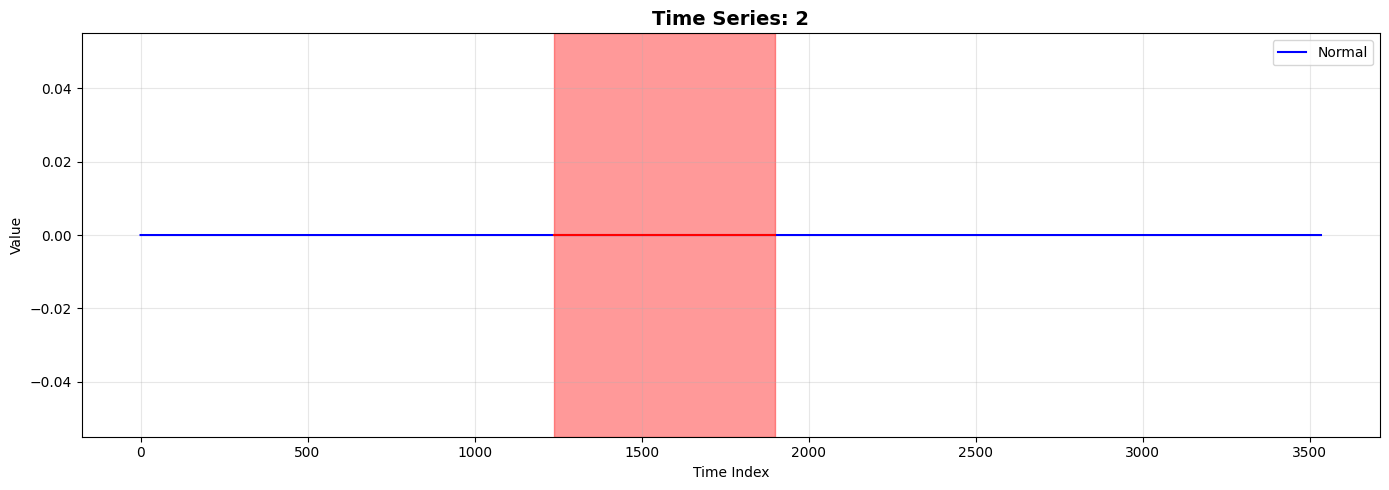

✓ Column: 2 | Shape: (3535,) | Anomalies: 228


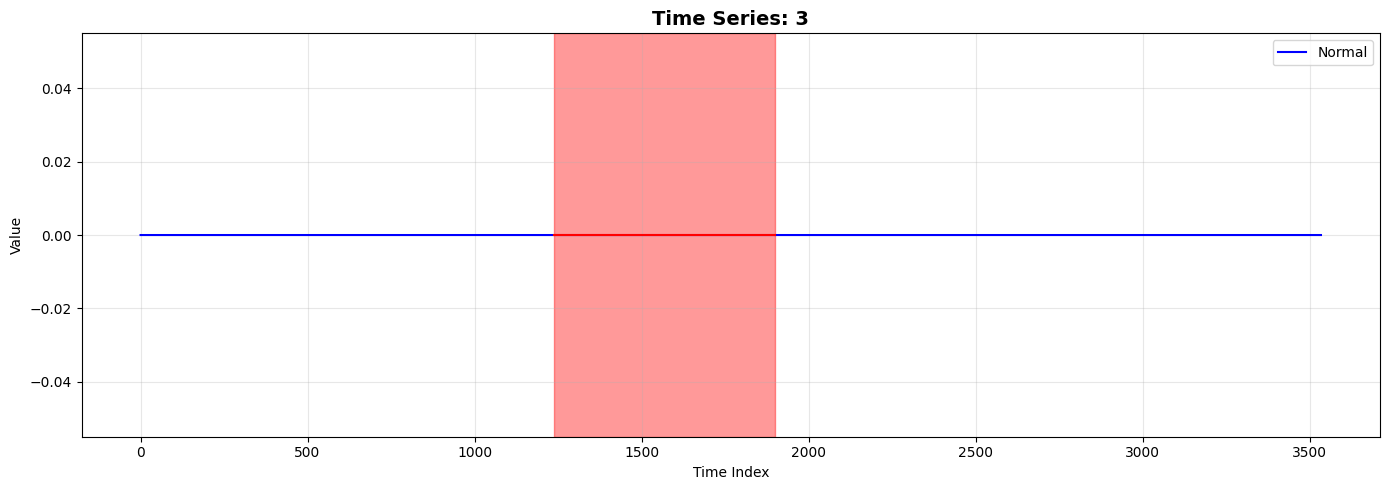

✓ Column: 3 | Shape: (3535,) | Anomalies: 228


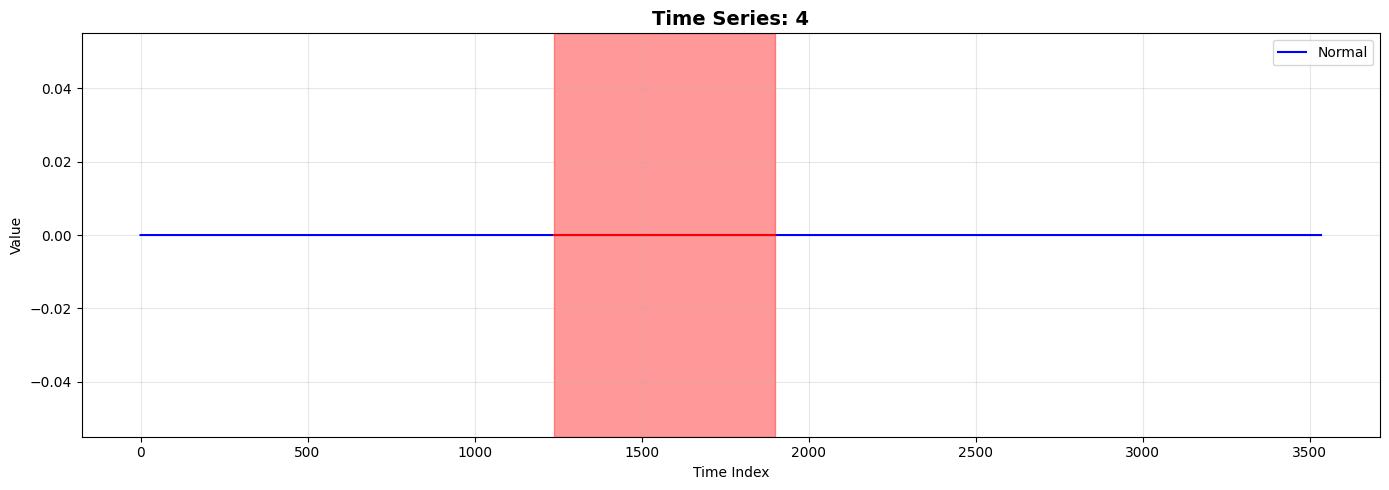

✓ Column: 4 | Shape: (3535,) | Anomalies: 228


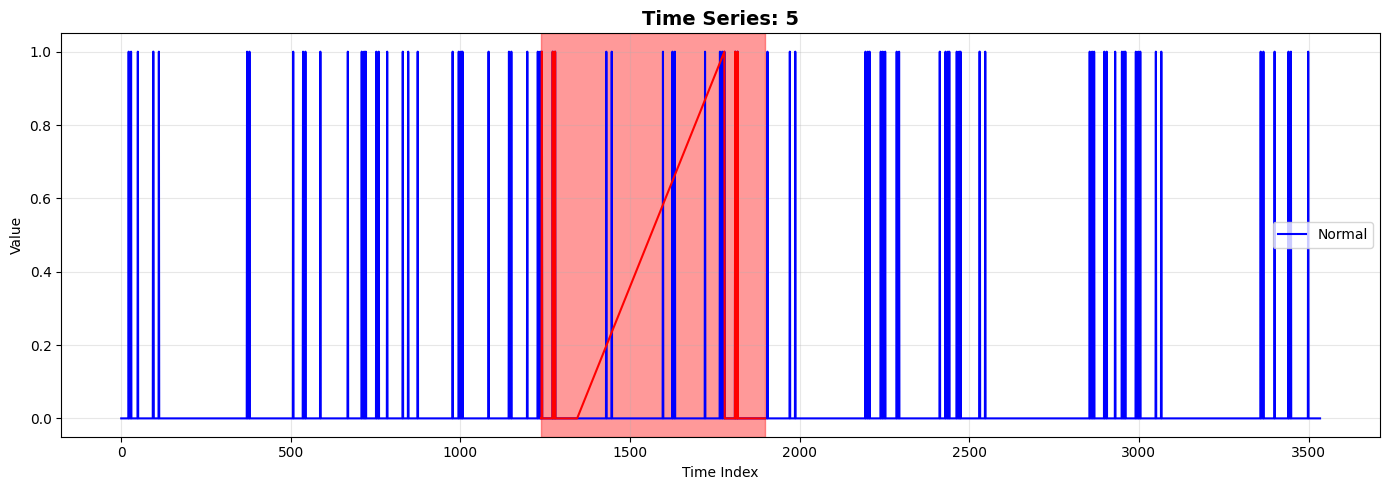

✓ Column: 5 | Shape: (3535,) | Anomalies: 228


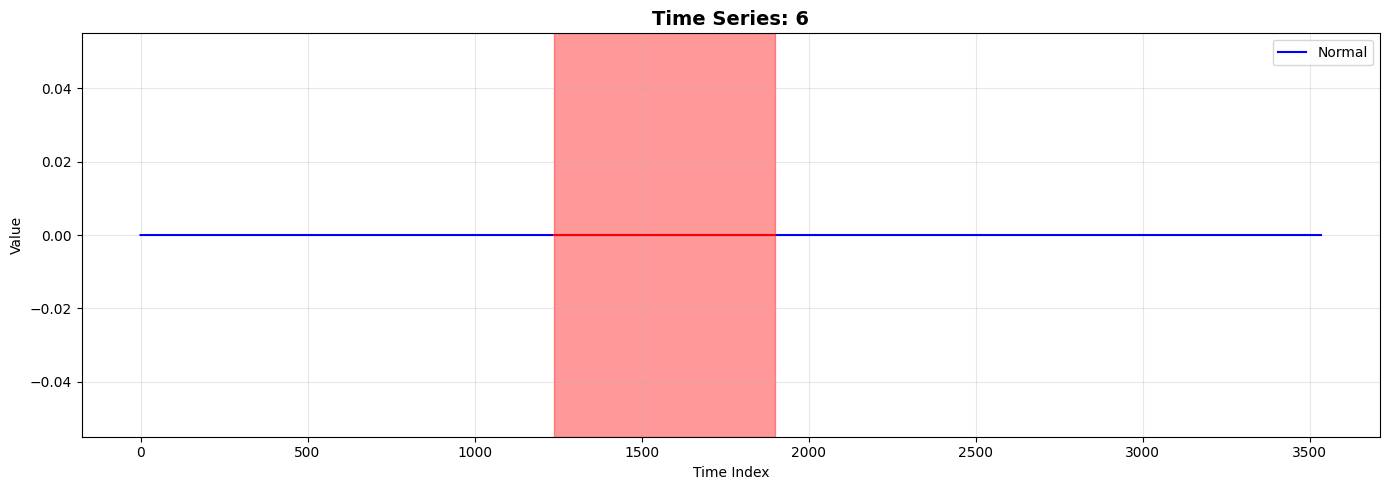

✓ Column: 6 | Shape: (3535,) | Anomalies: 228


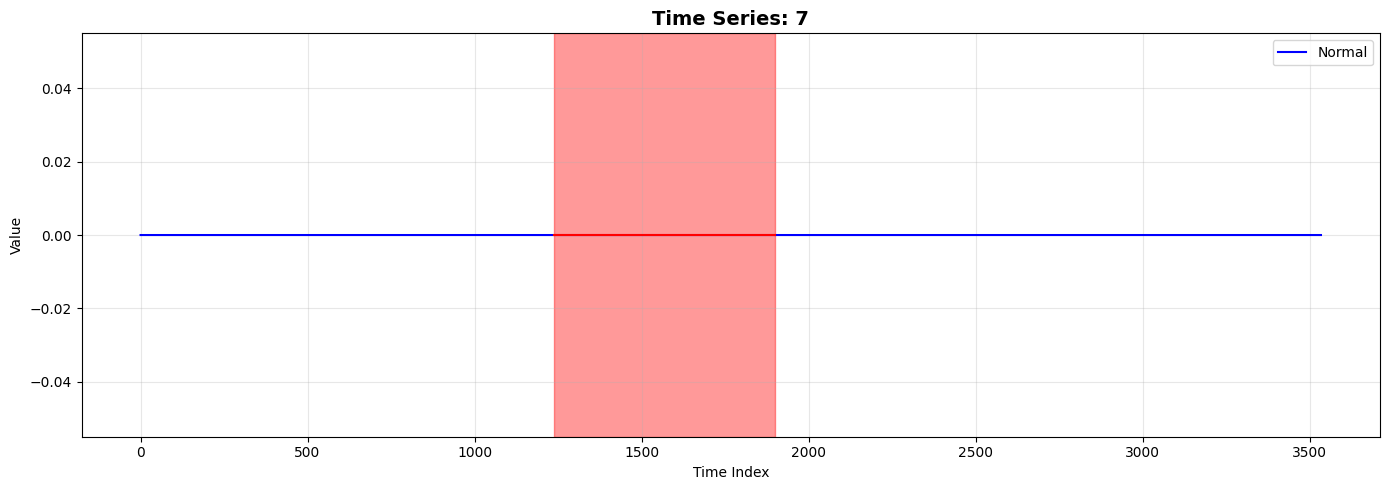

✓ Column: 7 | Shape: (3535,) | Anomalies: 228


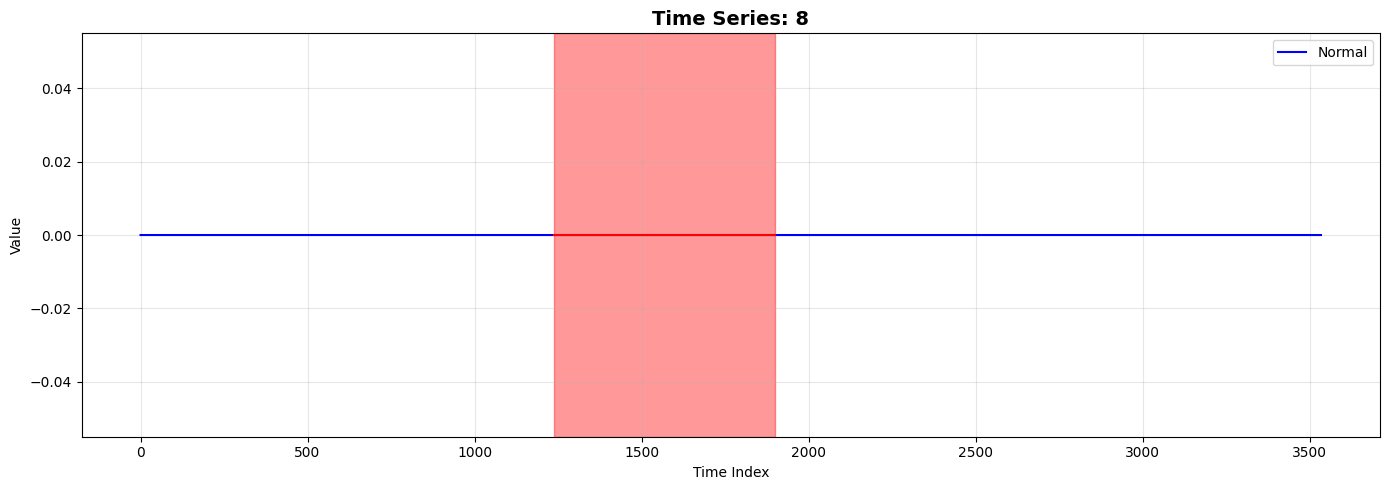

✓ Column: 8 | Shape: (3535,) | Anomalies: 228


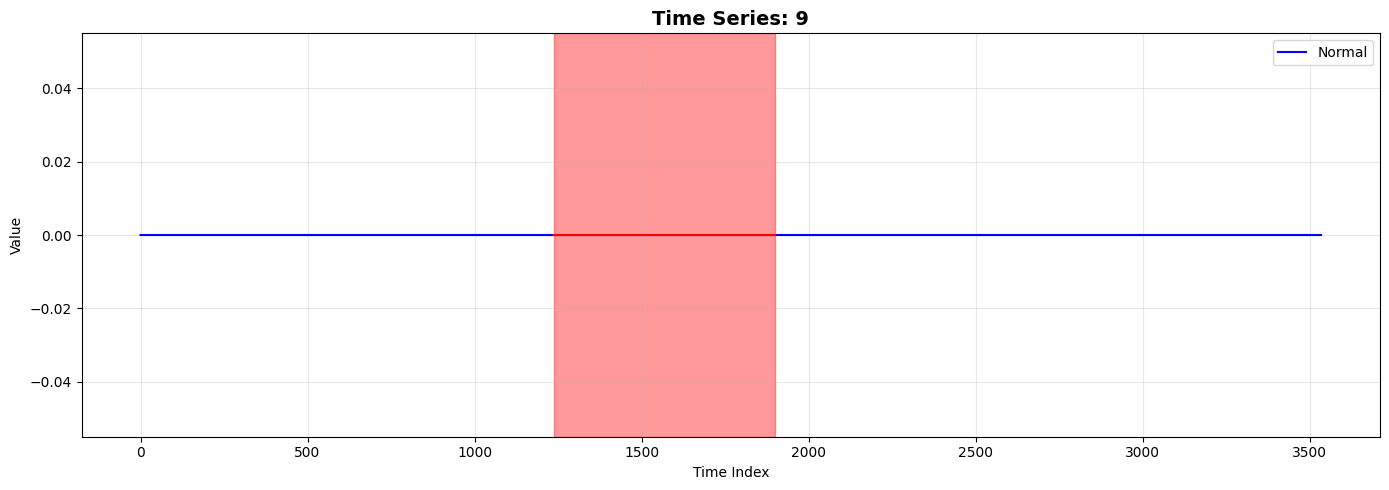

✓ Column: 9 | Shape: (3535,) | Anomalies: 228


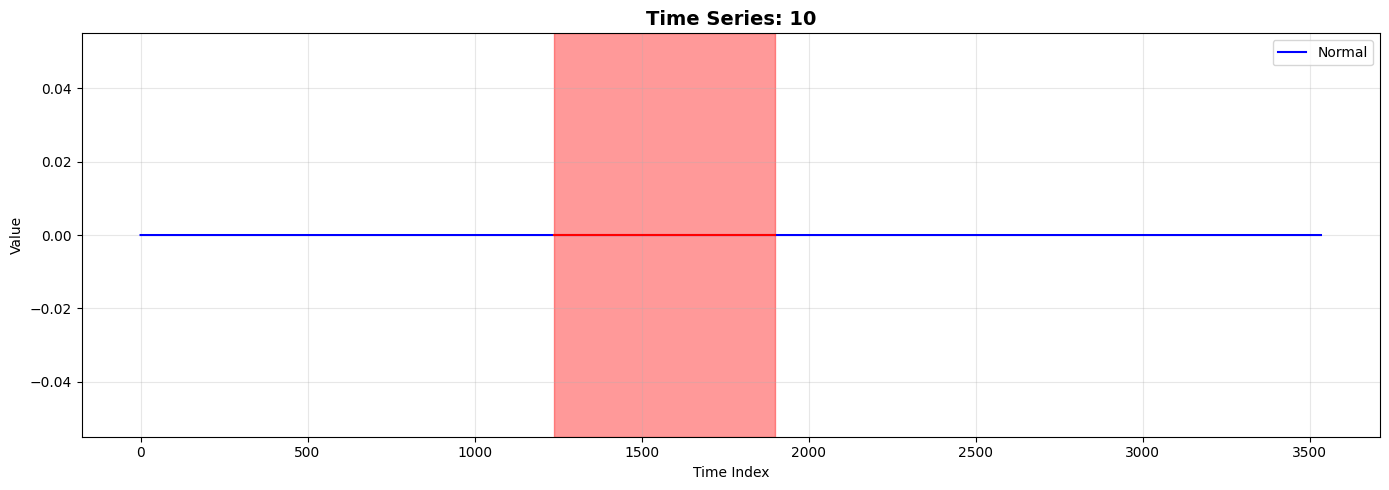

✓ Column: 10 | Shape: (3535,) | Anomalies: 228


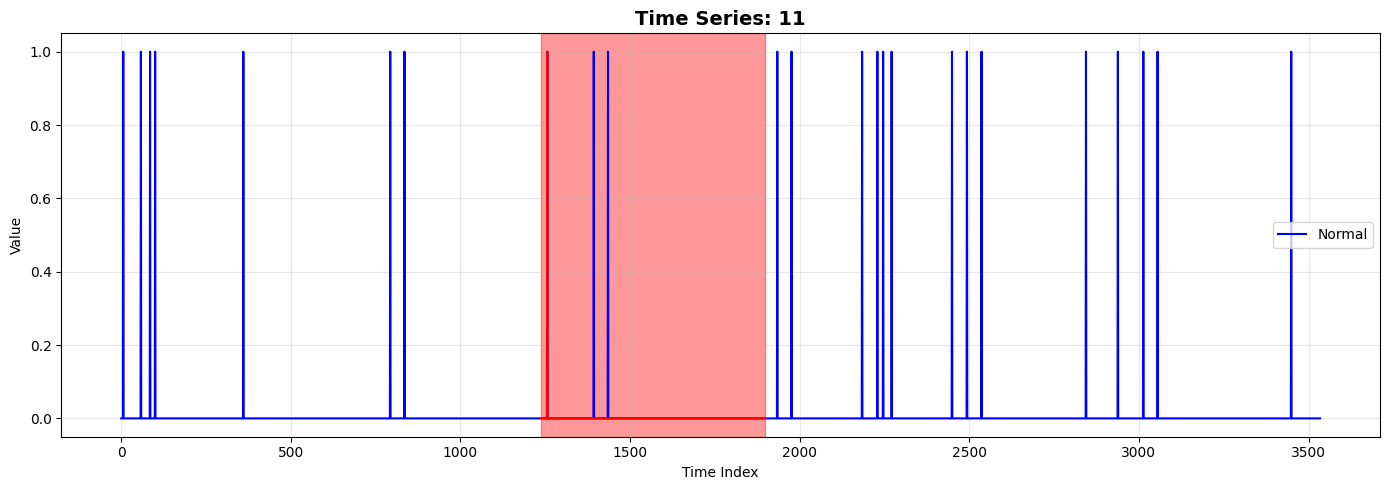

✓ Column: 11 | Shape: (3535,) | Anomalies: 228


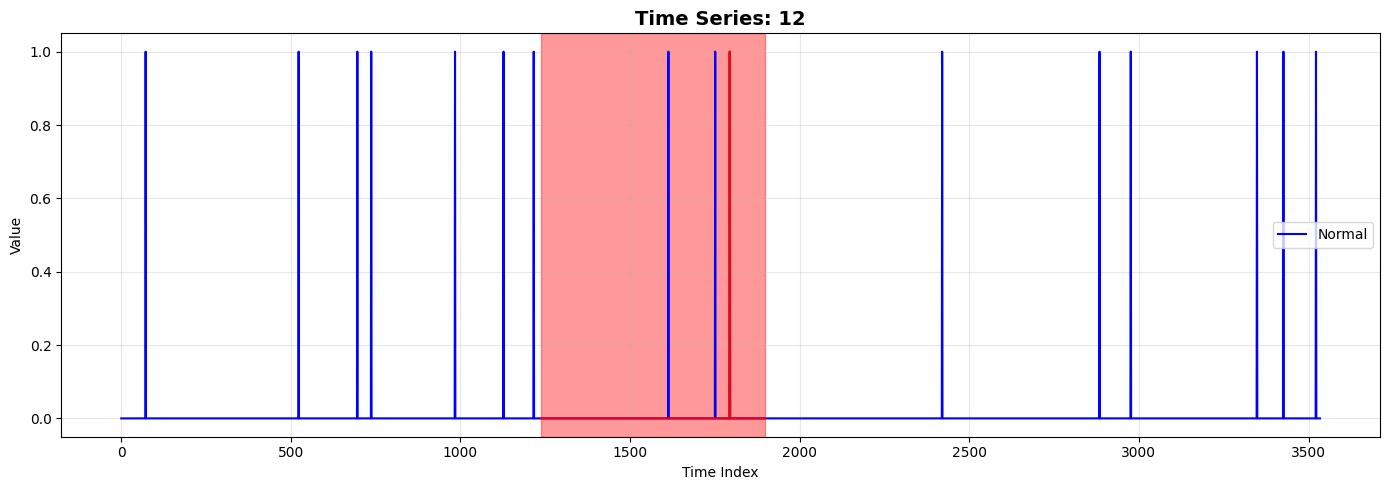

✓ Column: 12 | Shape: (3535,) | Anomalies: 228


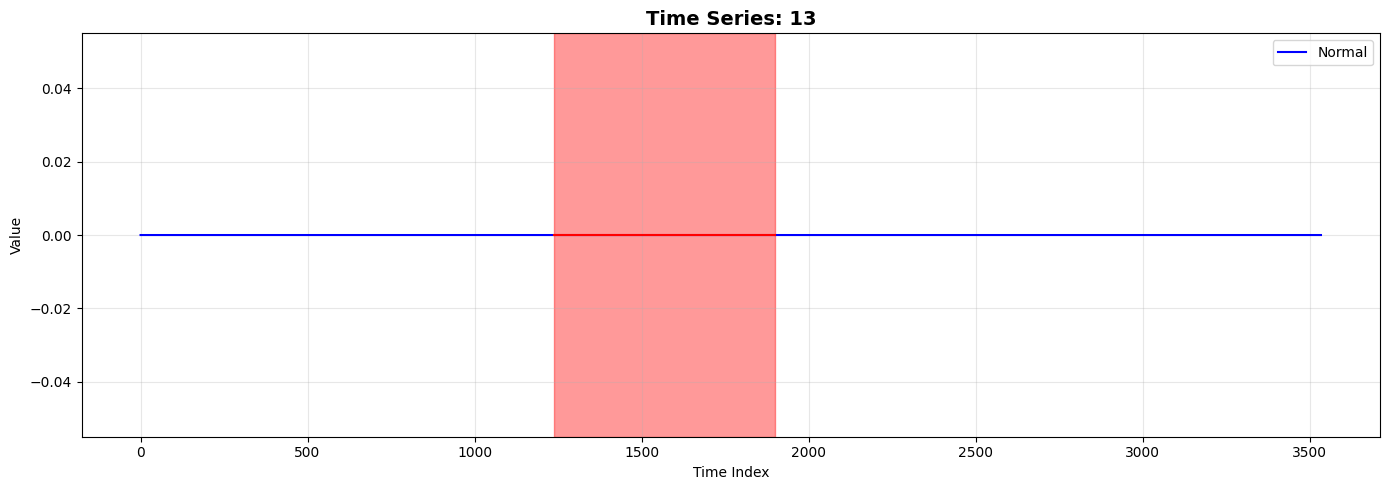

✓ Column: 13 | Shape: (3535,) | Anomalies: 228


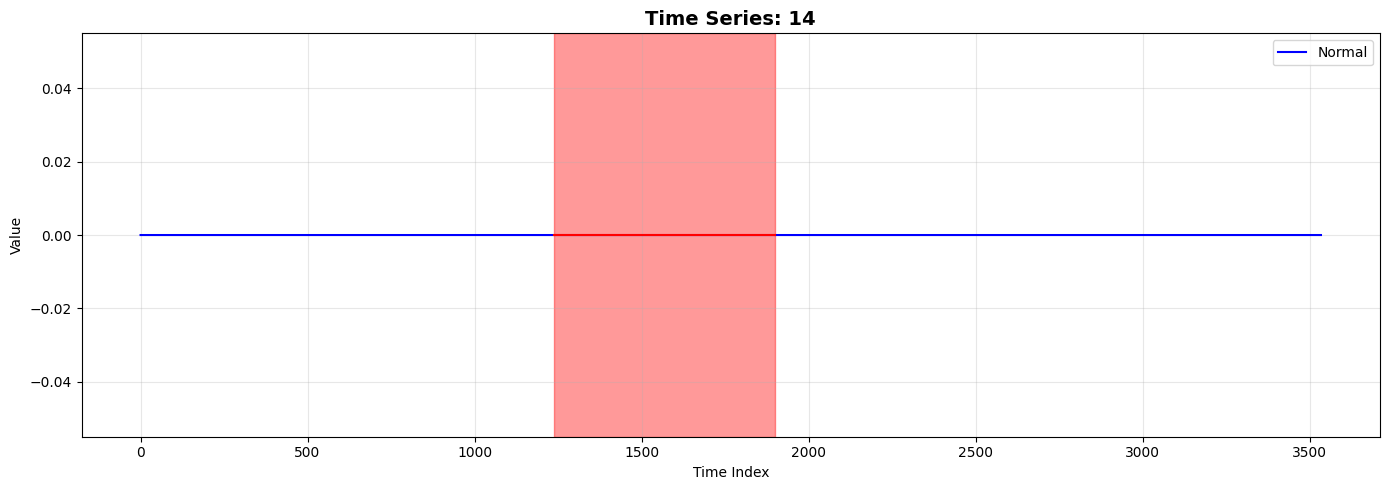

✓ Column: 14 | Shape: (3535,) | Anomalies: 228


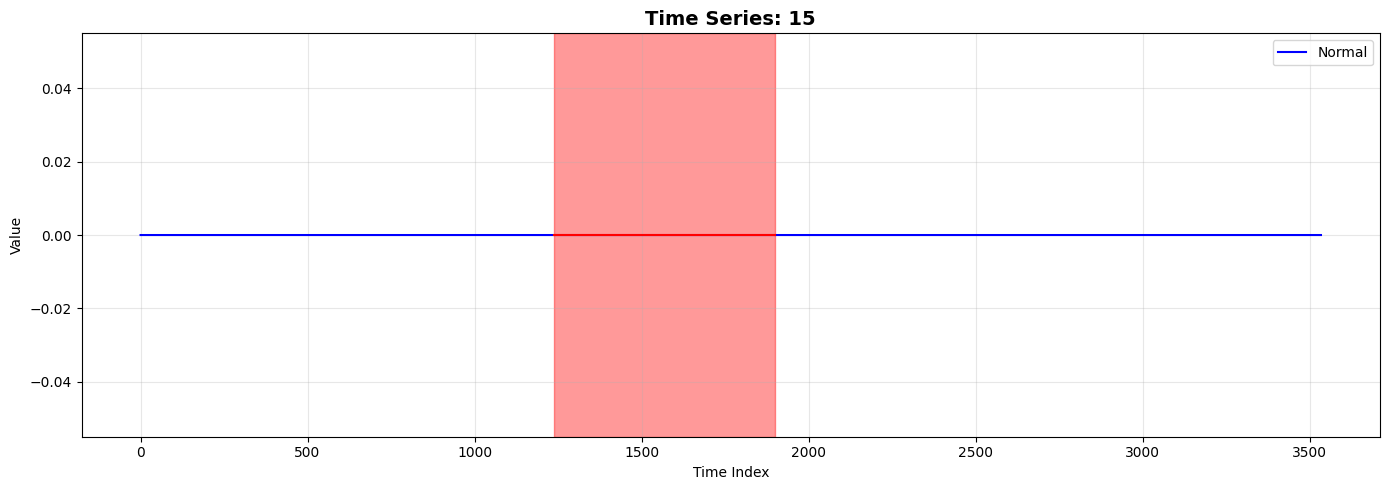

✓ Column: 15 | Shape: (3535,) | Anomalies: 228


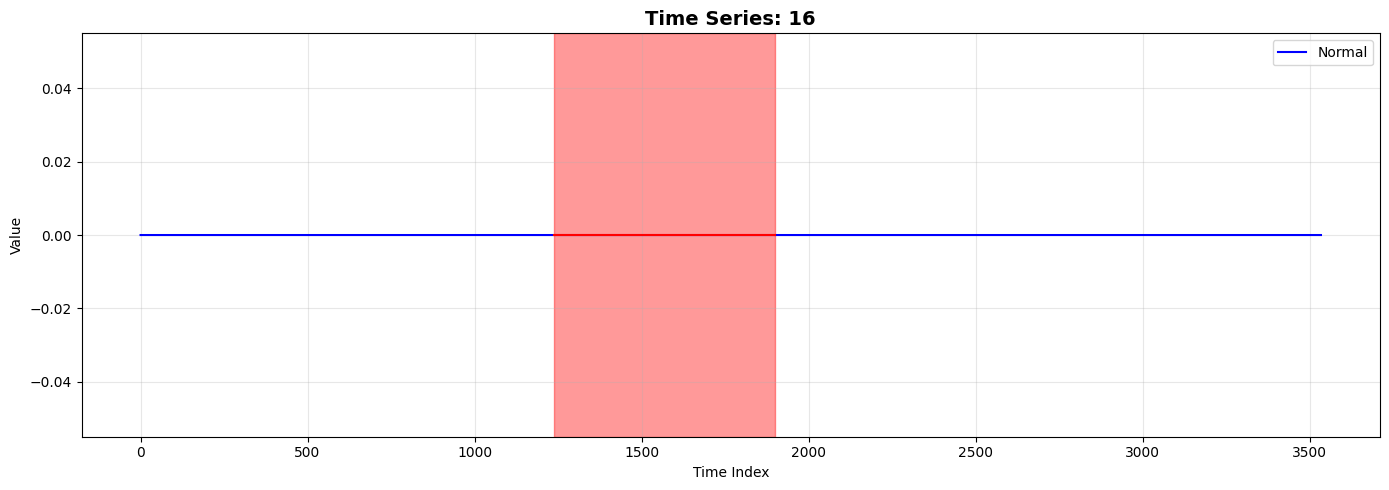

✓ Column: 16 | Shape: (3535,) | Anomalies: 228


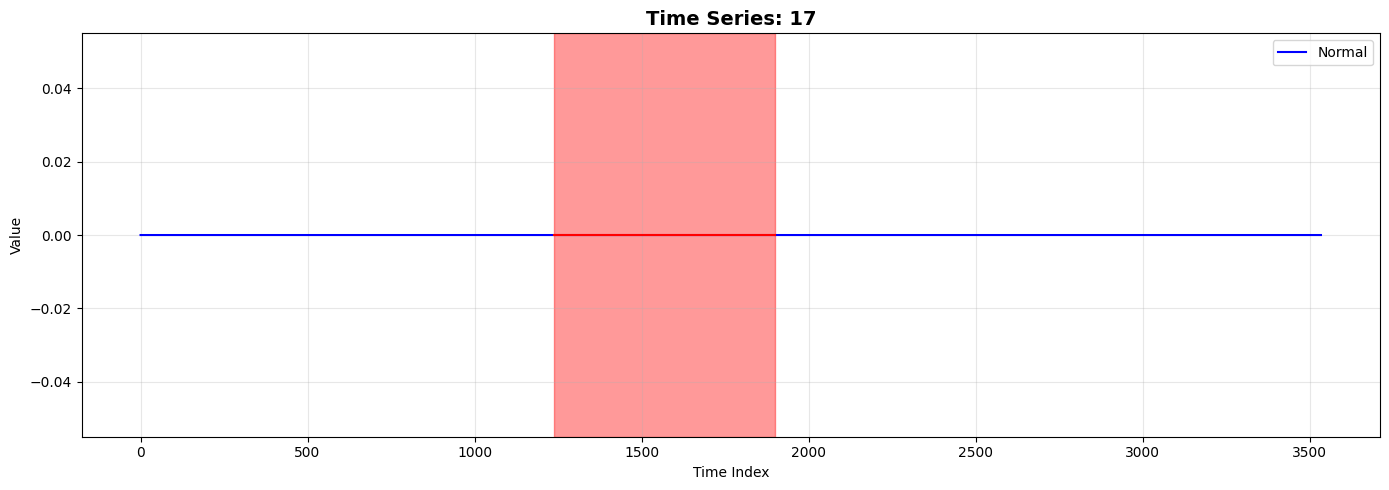

✓ Column: 17 | Shape: (3535,) | Anomalies: 228


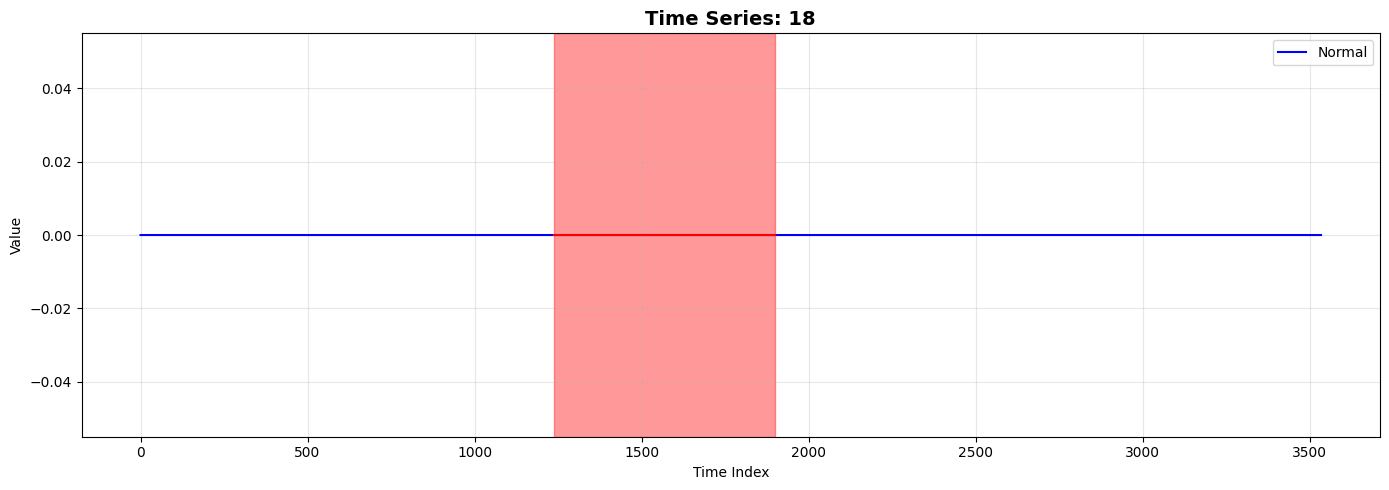

✓ Column: 18 | Shape: (3535,) | Anomalies: 228


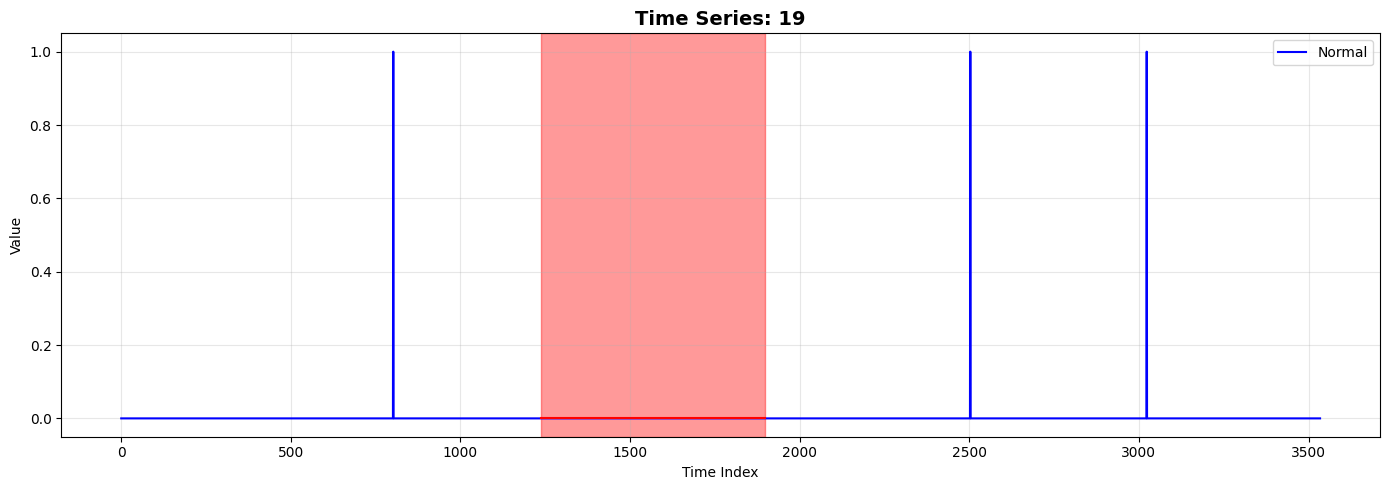

✓ Column: 19 | Shape: (3535,) | Anomalies: 228


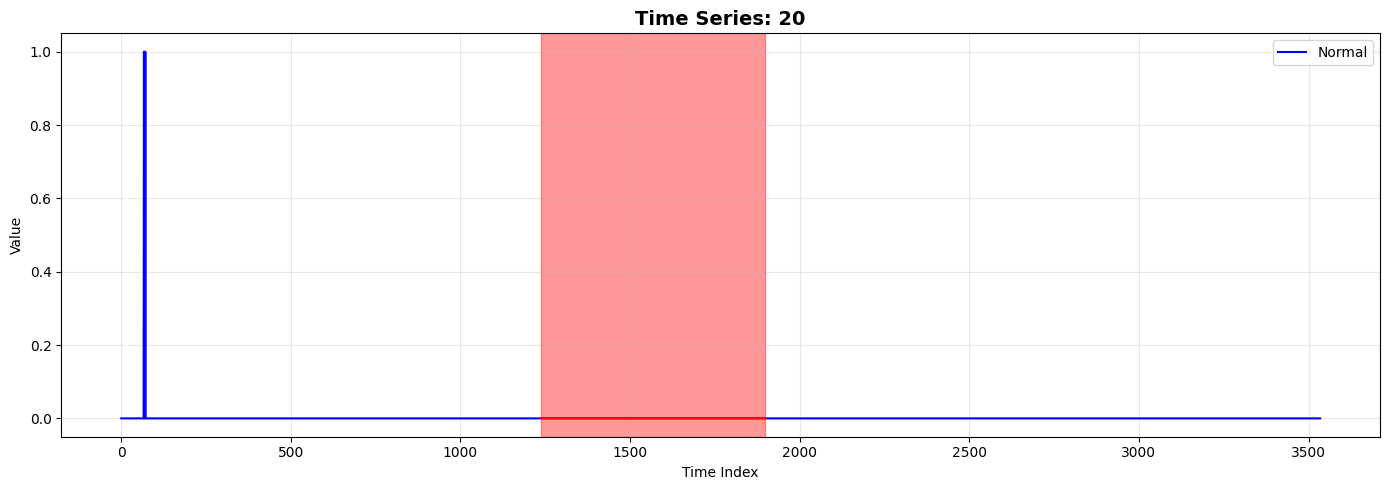

✓ Column: 20 | Shape: (3535,) | Anomalies: 228


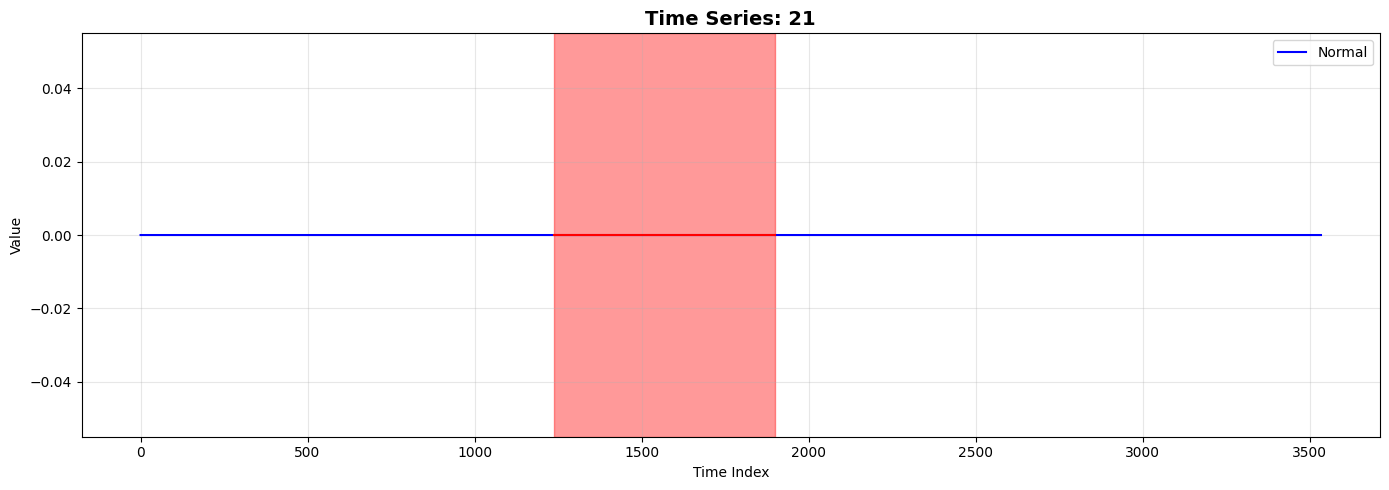

✓ Column: 21 | Shape: (3535,) | Anomalies: 228


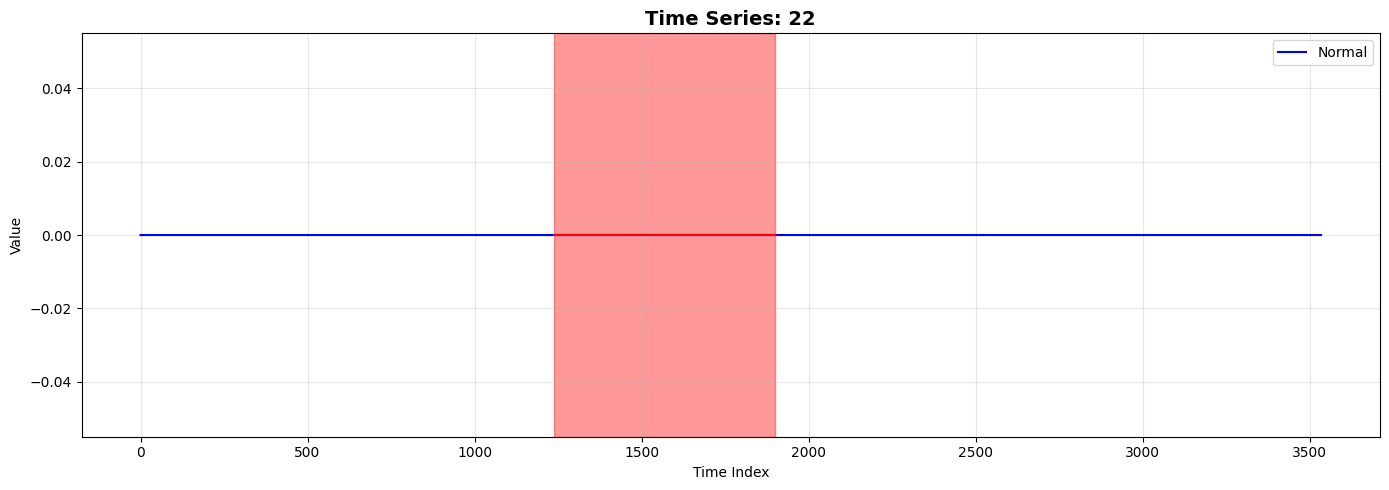

✓ Column: 22 | Shape: (3535,) | Anomalies: 228


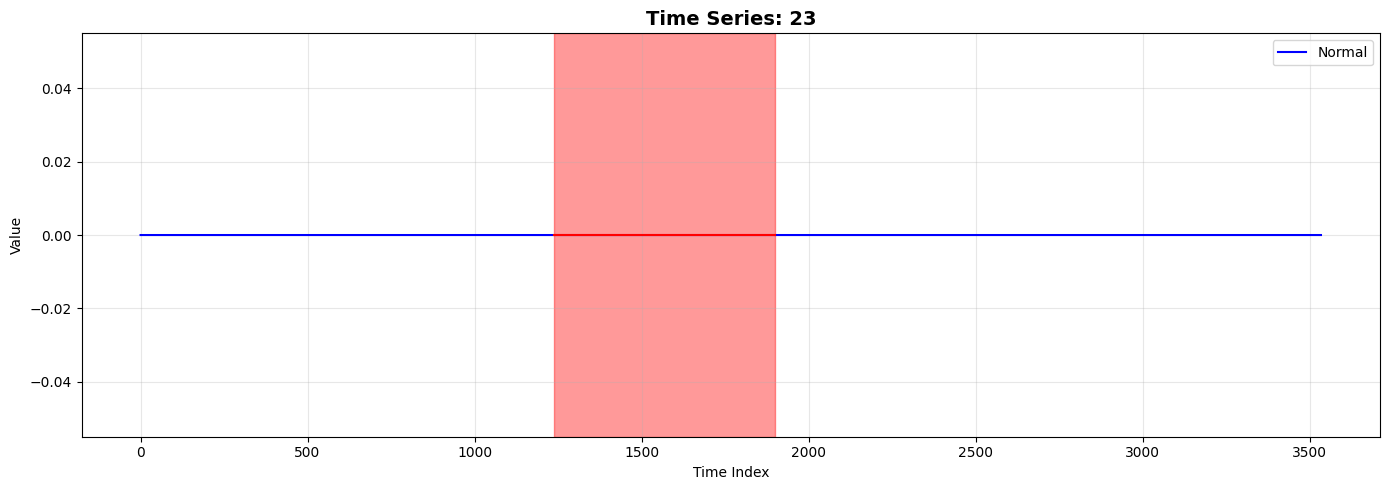

✓ Column: 23 | Shape: (3535,) | Anomalies: 228


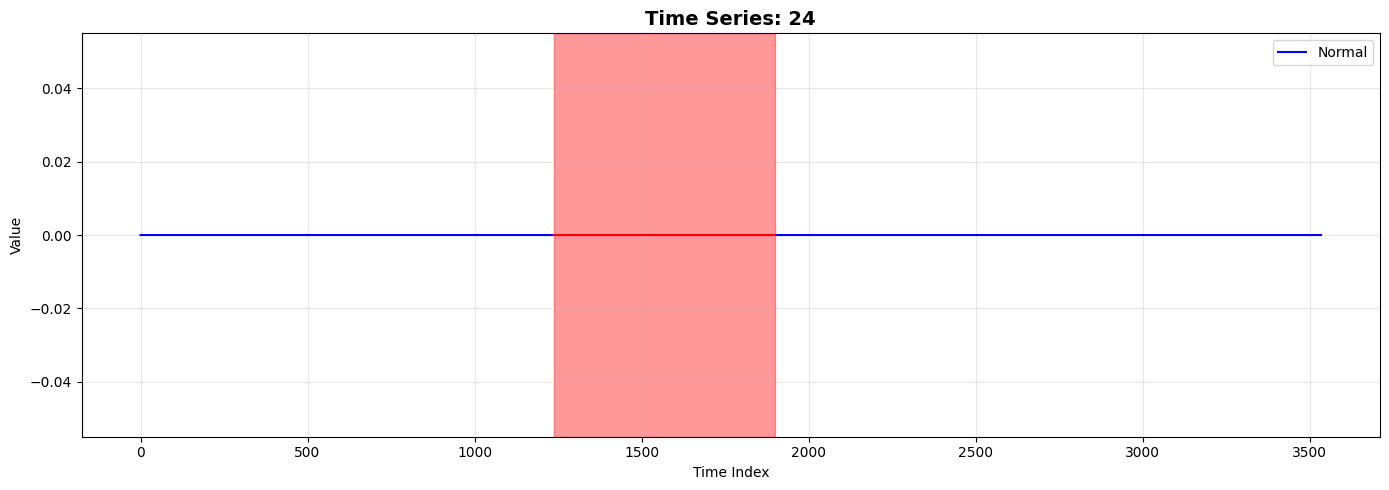

✓ Column: 24 | Shape: (3535,) | Anomalies: 228


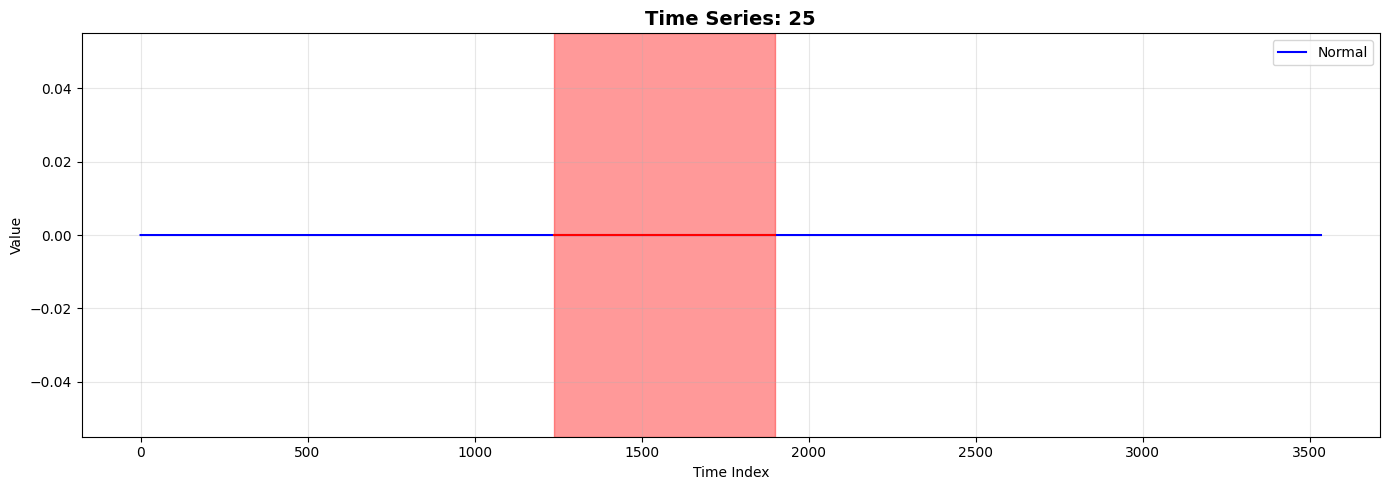

✓ Column: 25 | Shape: (3535,) | Anomalies: 228


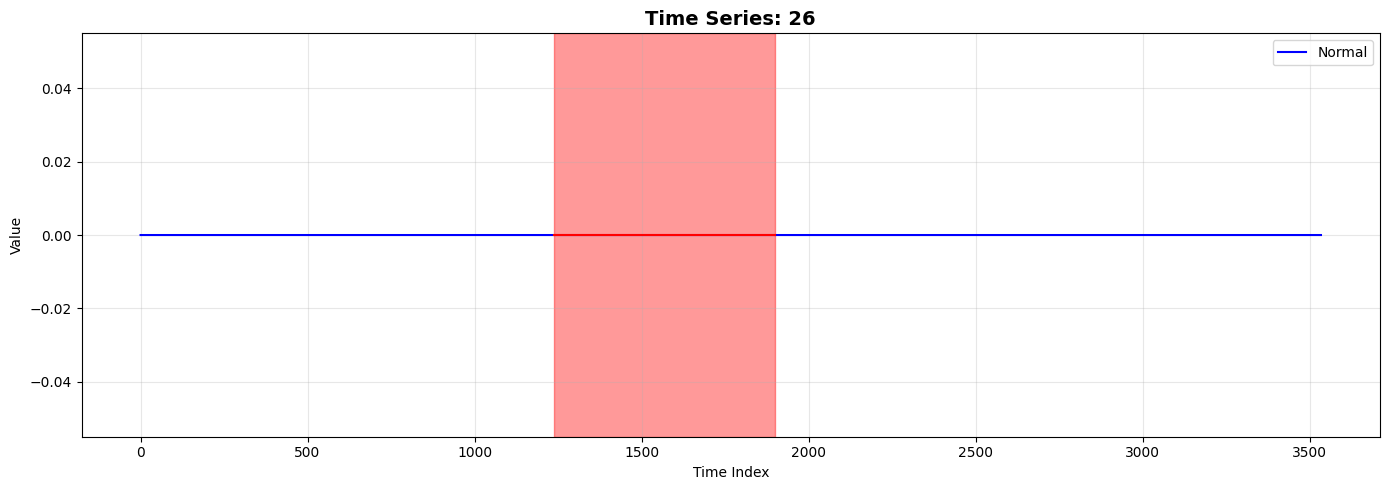

✓ Column: 26 | Shape: (3535,) | Anomalies: 228


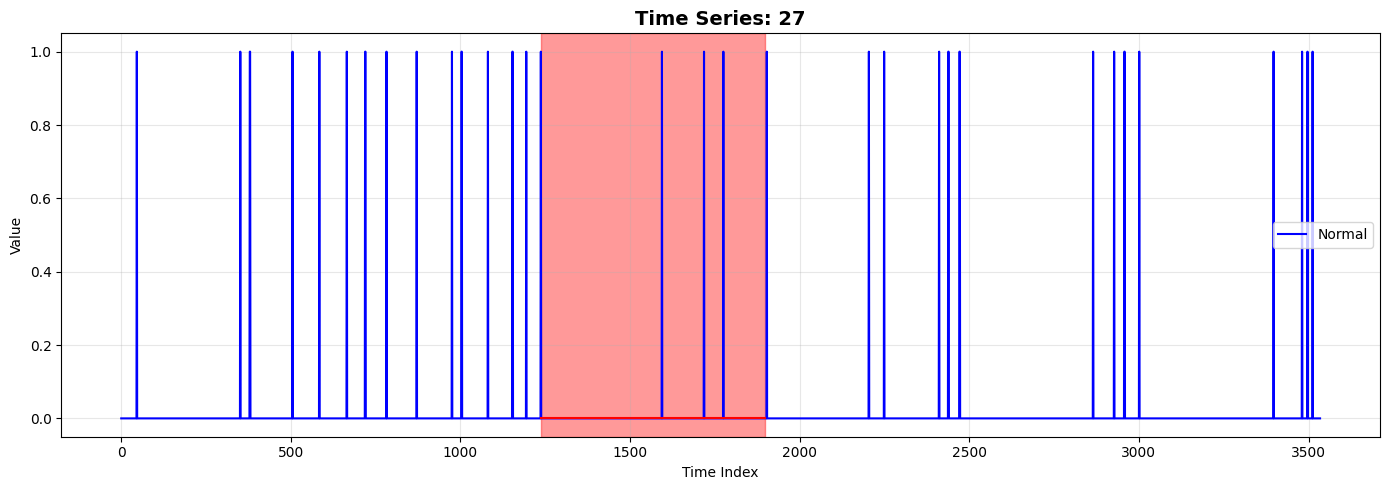

✓ Column: 27 | Shape: (3535,) | Anomalies: 228


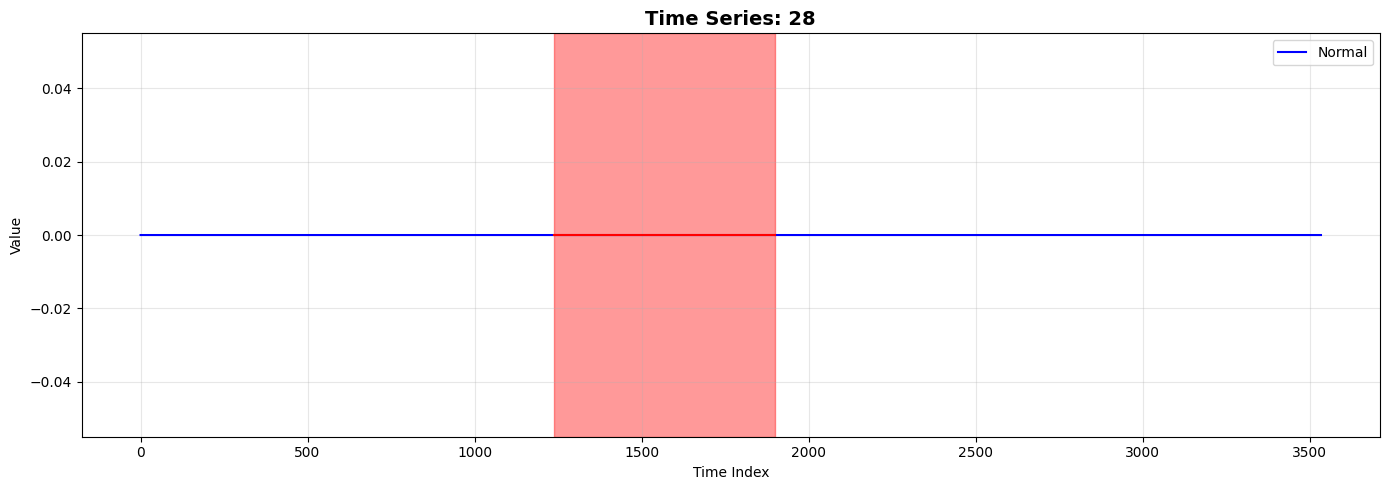

✓ Column: 28 | Shape: (3535,) | Anomalies: 228


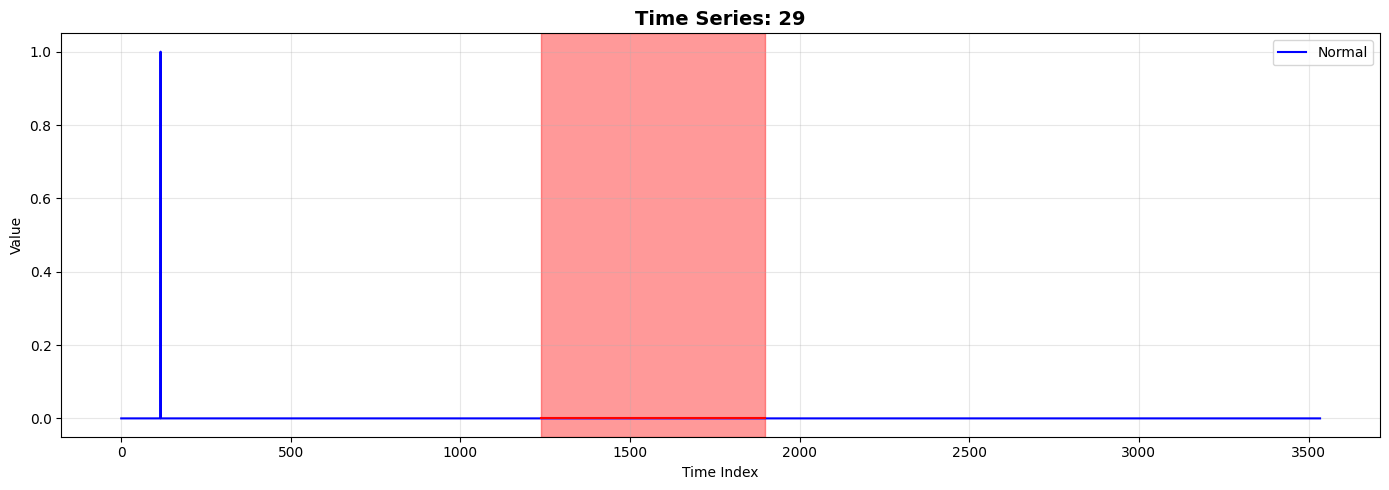

✓ Column: 29 | Shape: (3535,) | Anomalies: 228


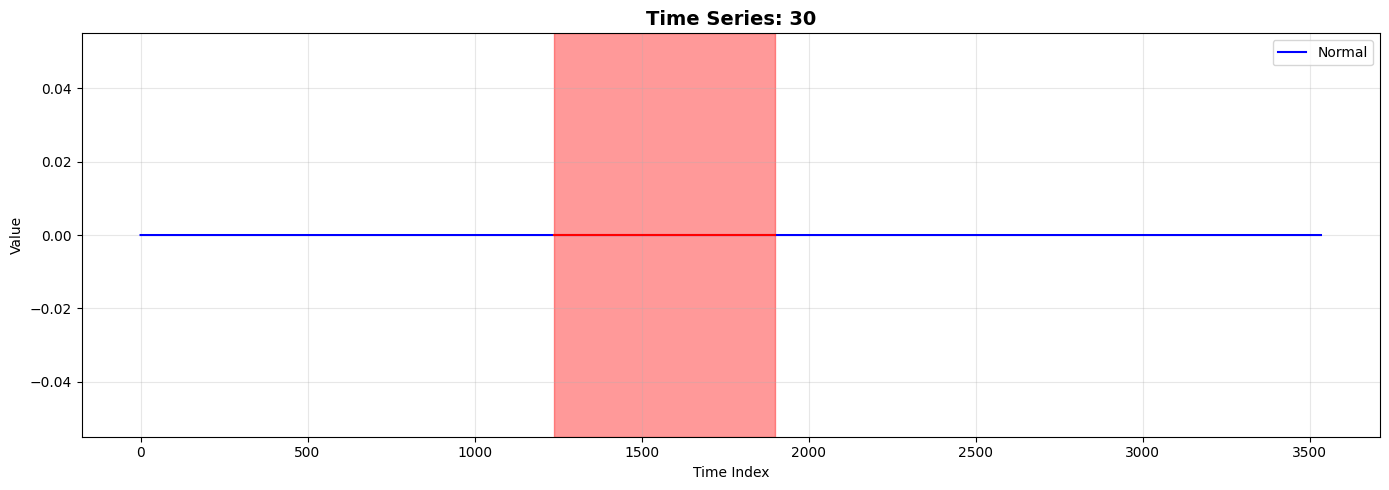

✓ Column: 30 | Shape: (3535,) | Anomalies: 228


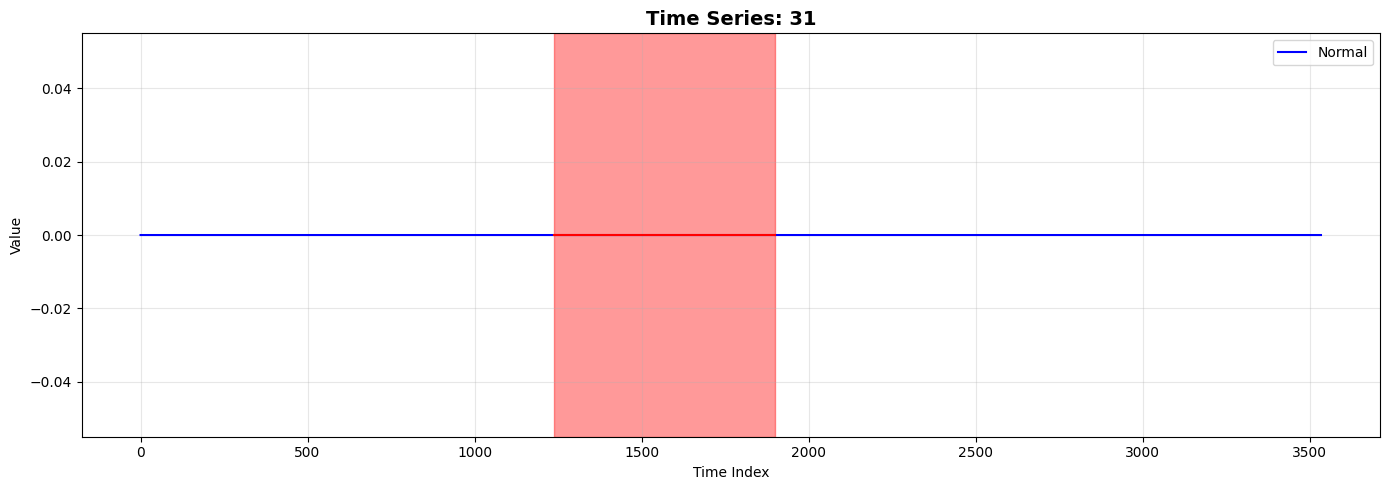

✓ Column: 31 | Shape: (3535,) | Anomalies: 228


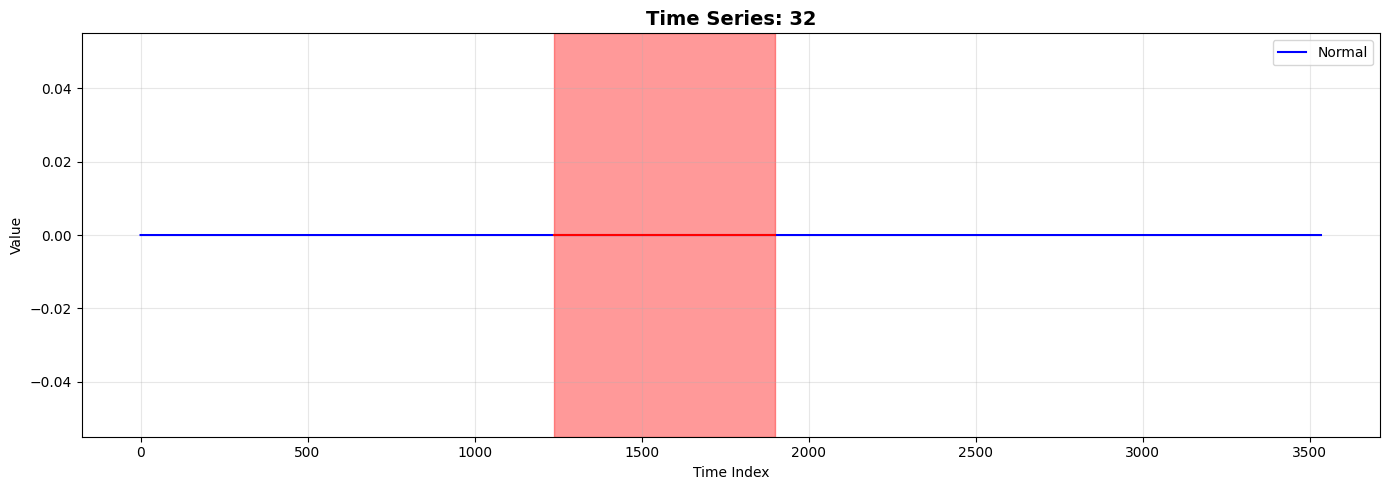

✓ Column: 32 | Shape: (3535,) | Anomalies: 228


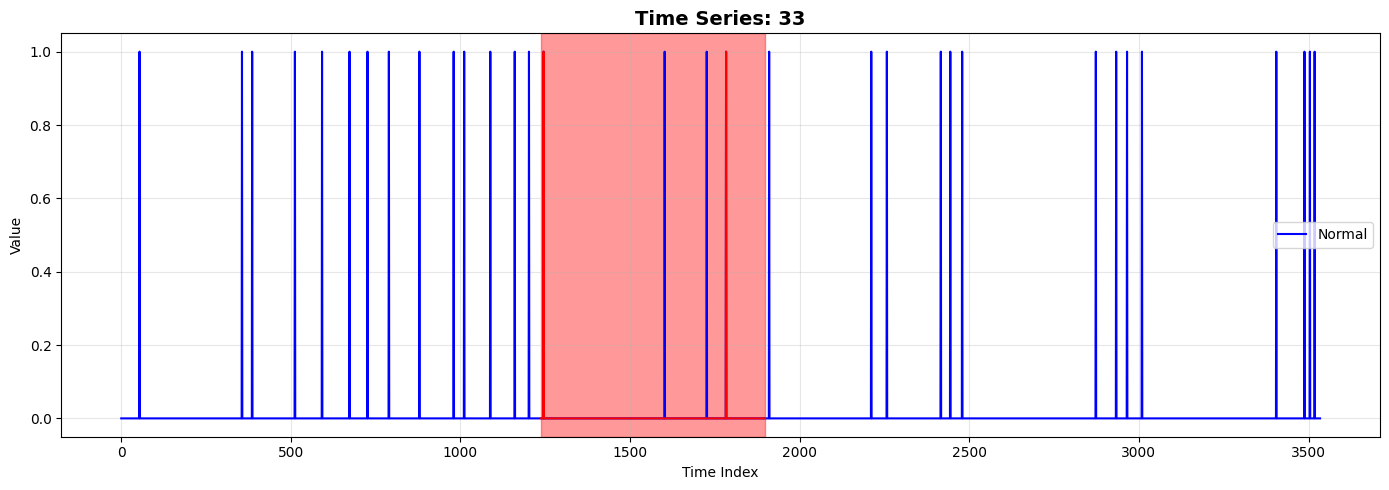

✓ Column: 33 | Shape: (3535,) | Anomalies: 228


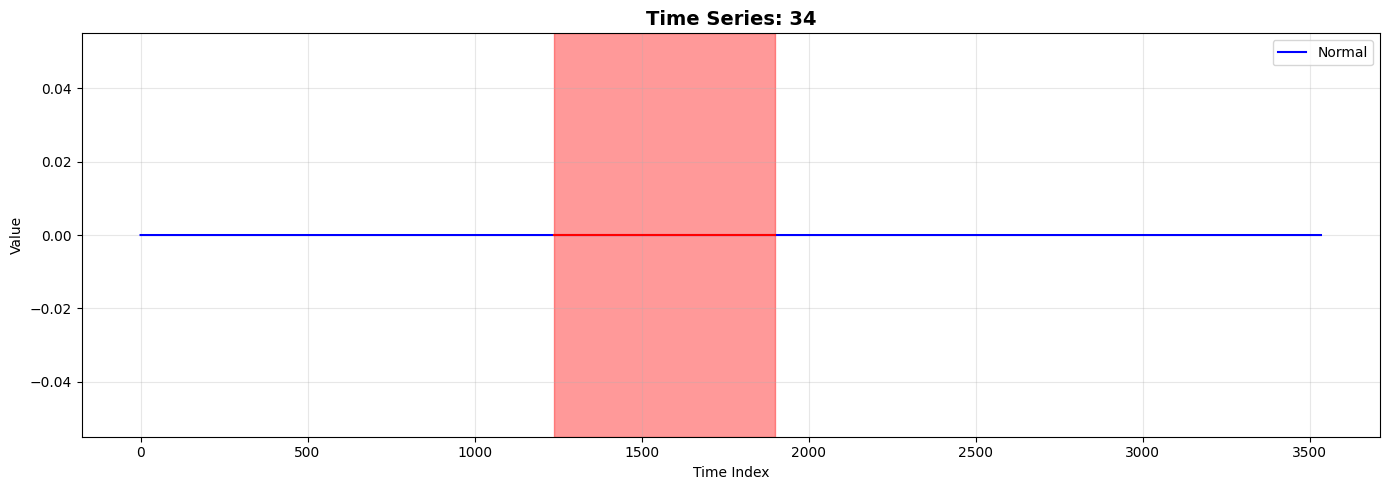

✓ Column: 34 | Shape: (3535,) | Anomalies: 228


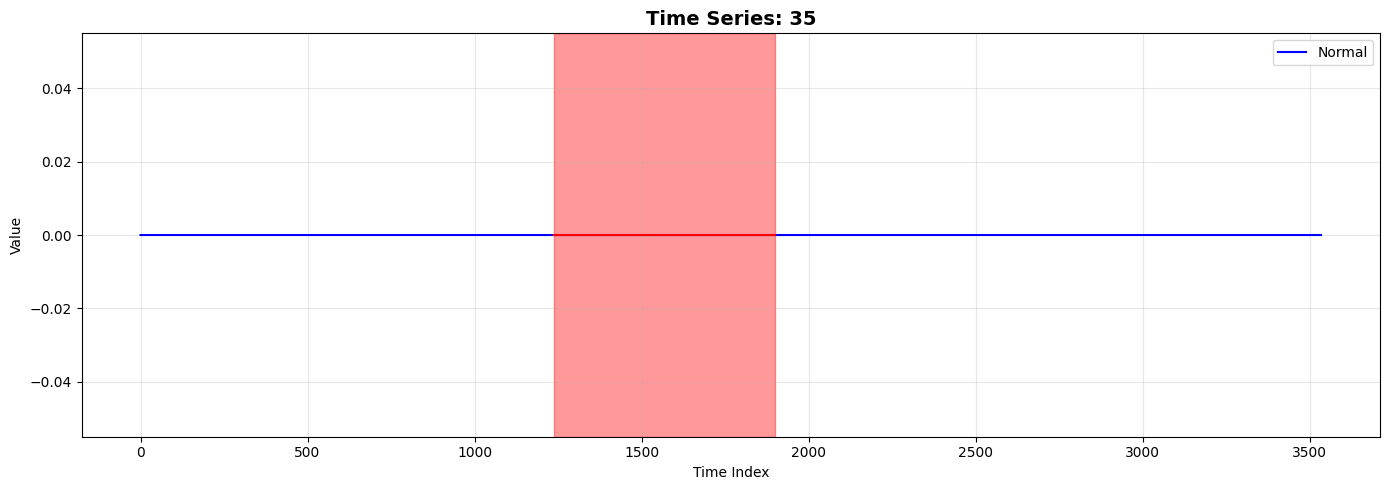

✓ Column: 35 | Shape: (3535,) | Anomalies: 228


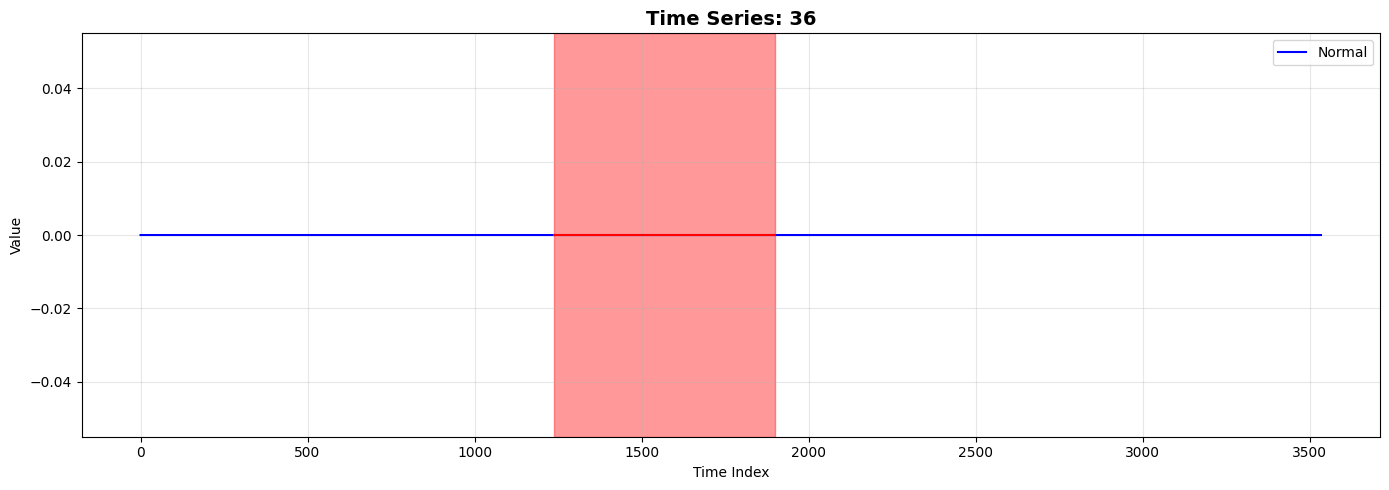

✓ Column: 36 | Shape: (3535,) | Anomalies: 228


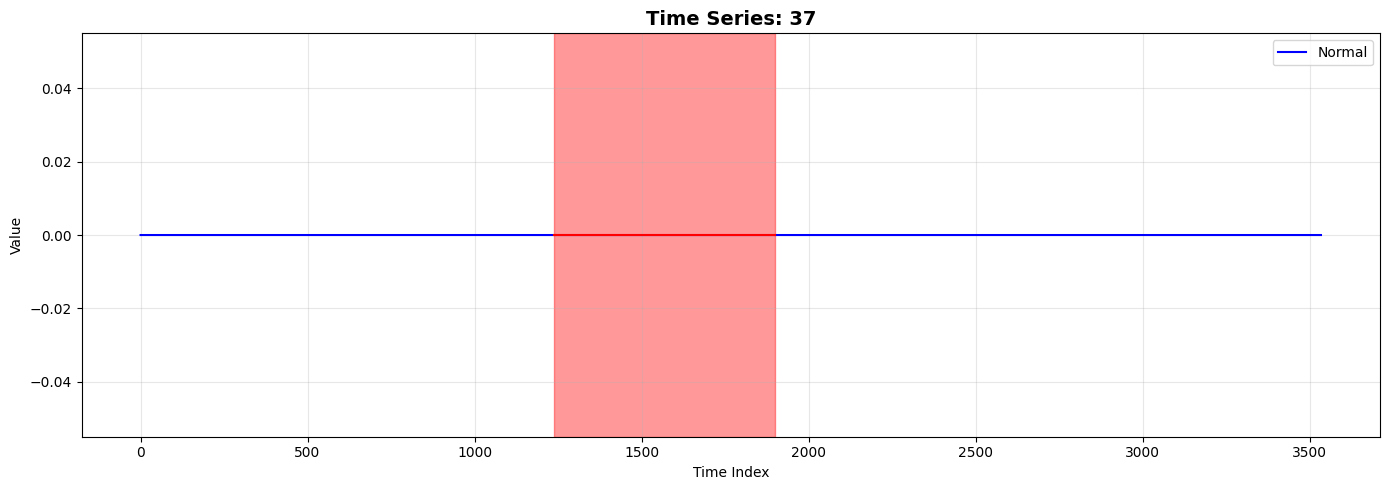

✓ Column: 37 | Shape: (3535,) | Anomalies: 228


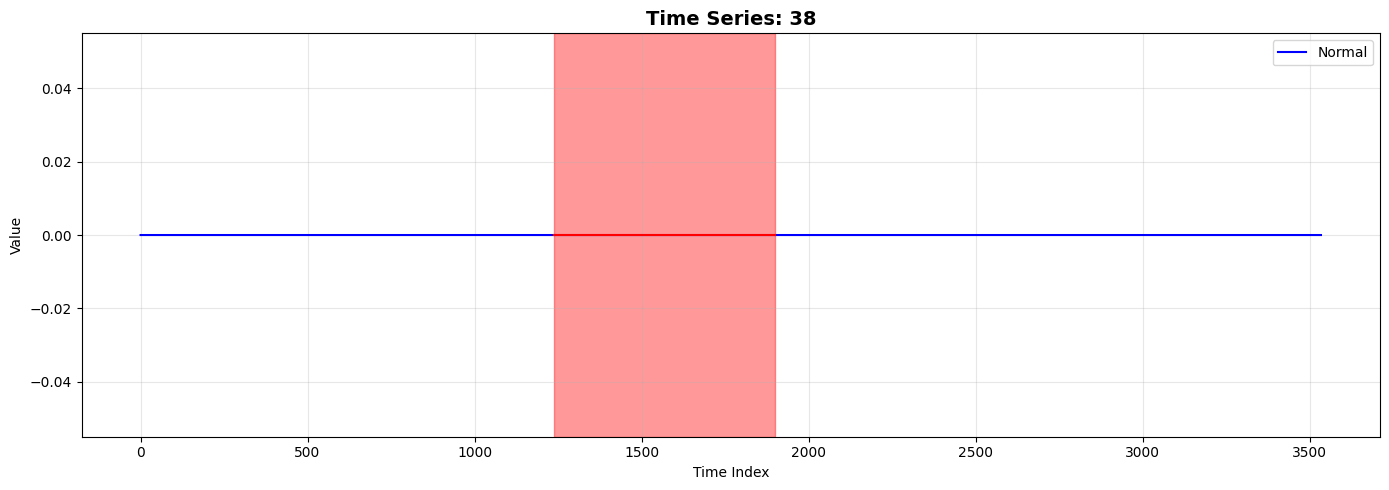

✓ Column: 38 | Shape: (3535,) | Anomalies: 228


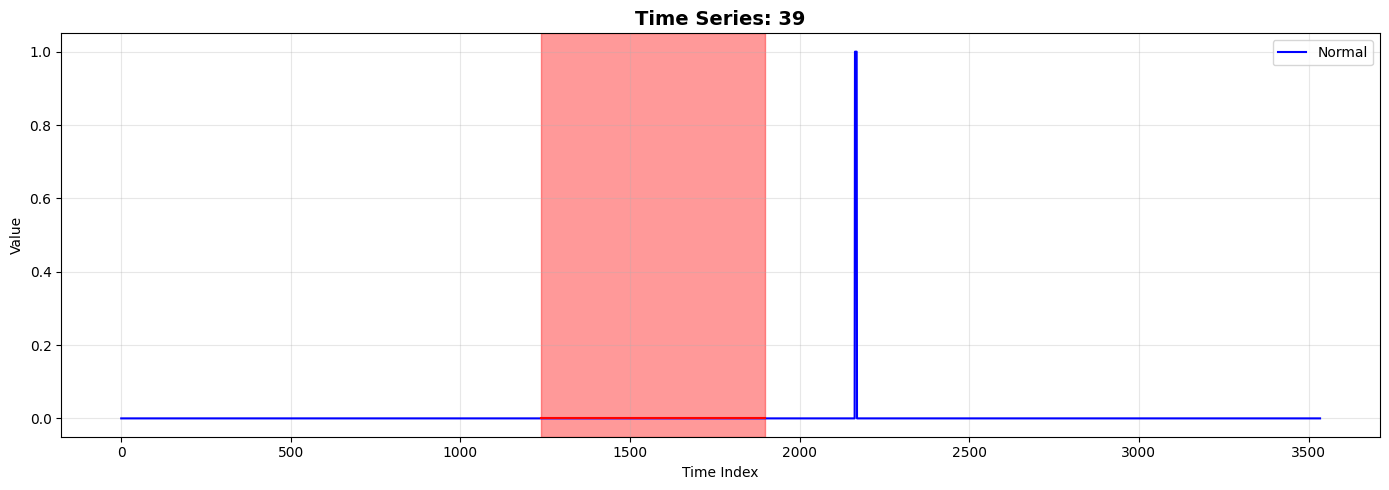

✓ Column: 39 | Shape: (3535,) | Anomalies: 228


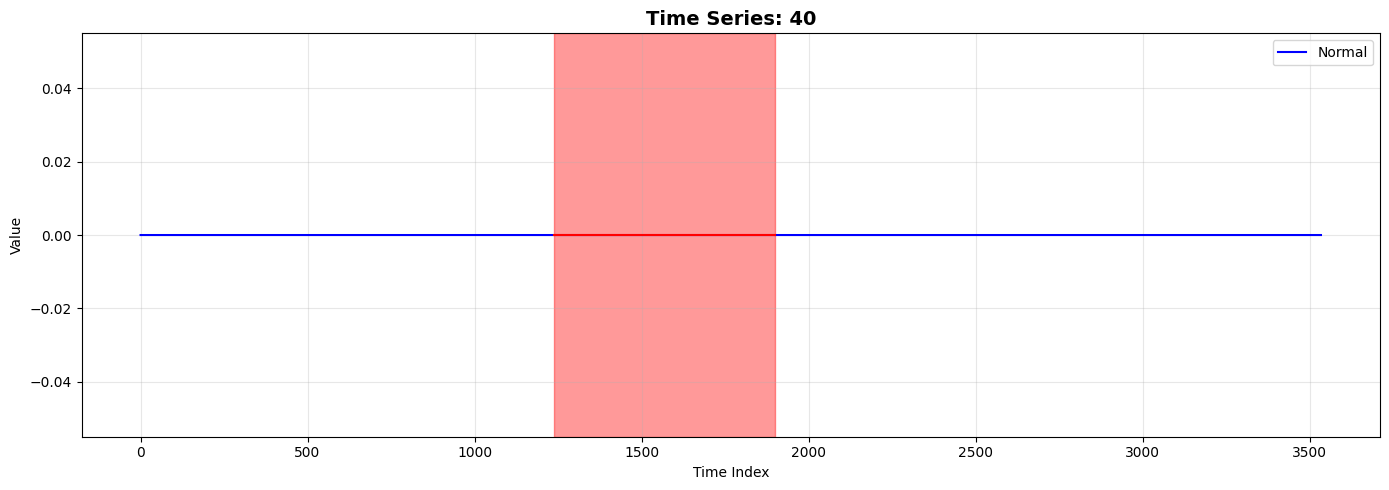

✓ Column: 40 | Shape: (3535,) | Anomalies: 228


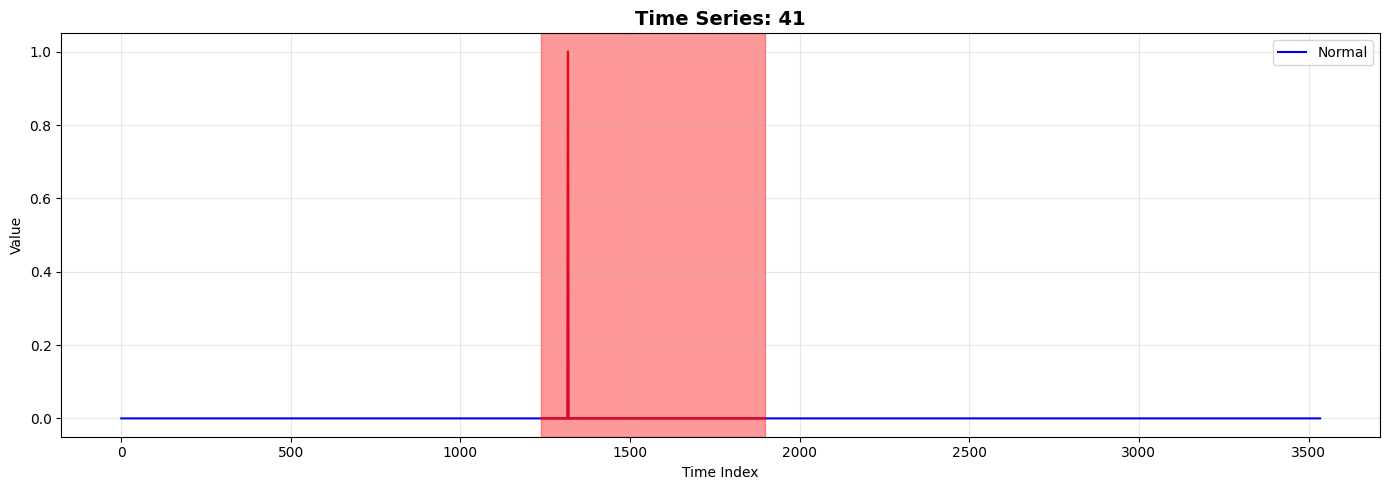

✓ Column: 41 | Shape: (3535,) | Anomalies: 228


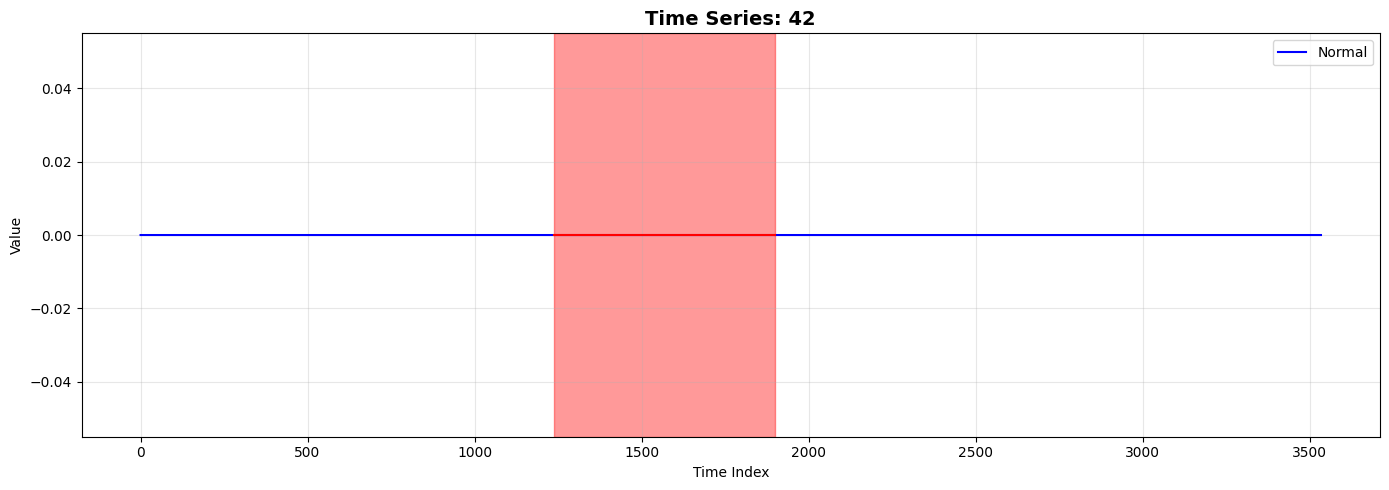

✓ Column: 42 | Shape: (3535,) | Anomalies: 228


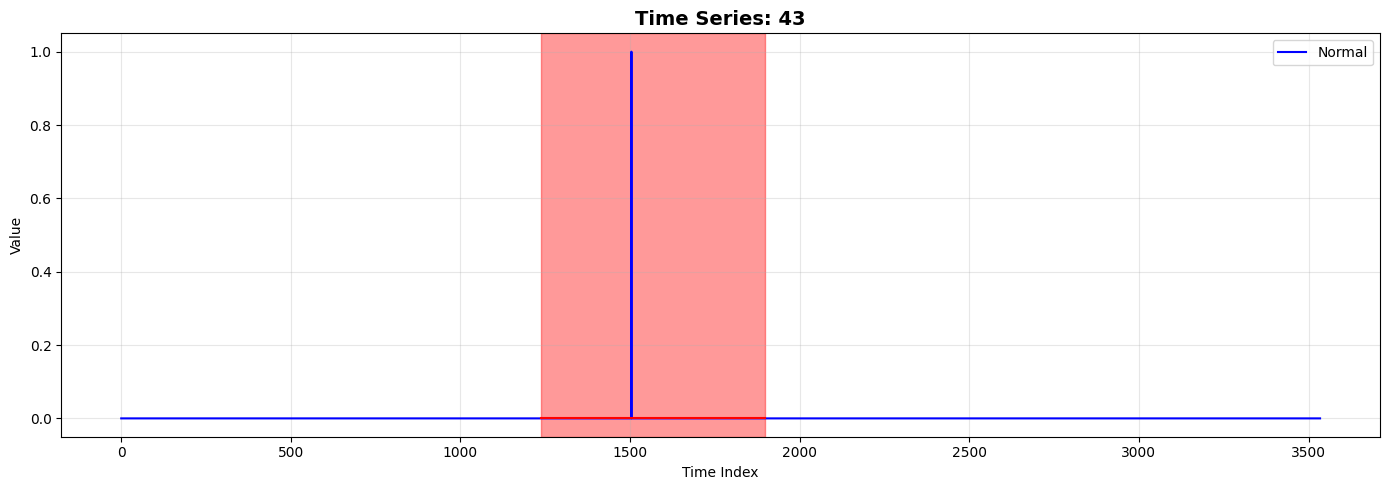

✓ Column: 43 | Shape: (3535,) | Anomalies: 228


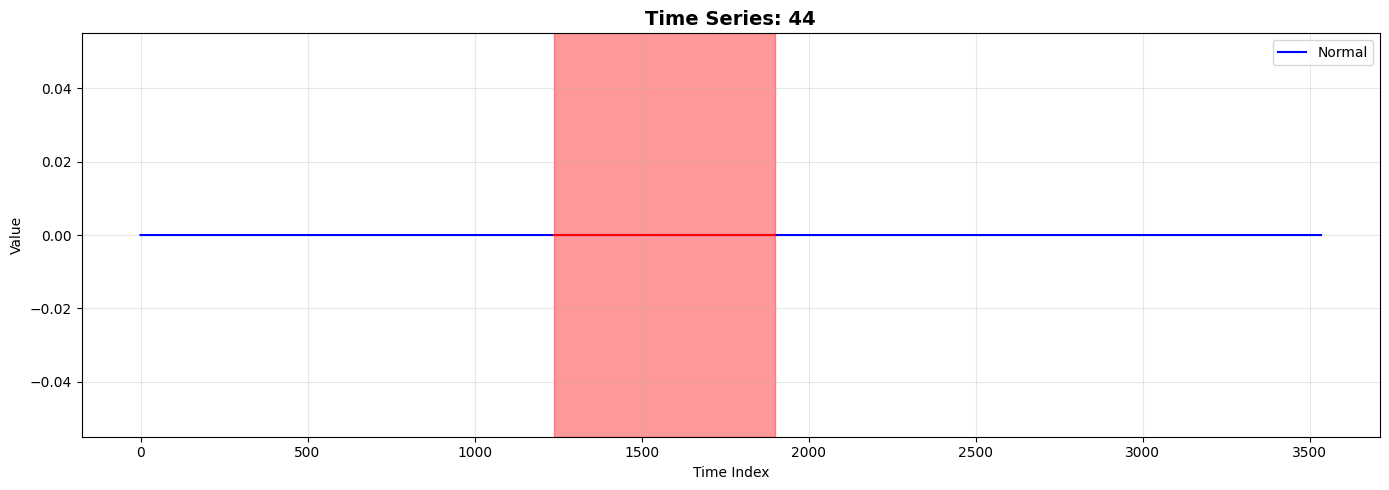

✓ Column: 44 | Shape: (3535,) | Anomalies: 228


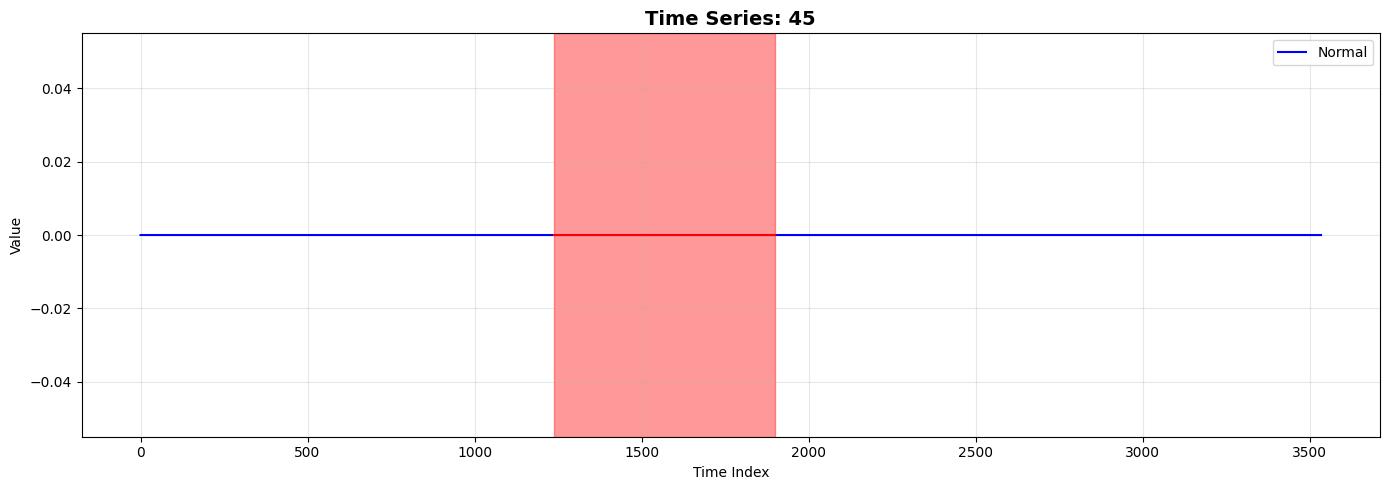

✓ Column: 45 | Shape: (3535,) | Anomalies: 228


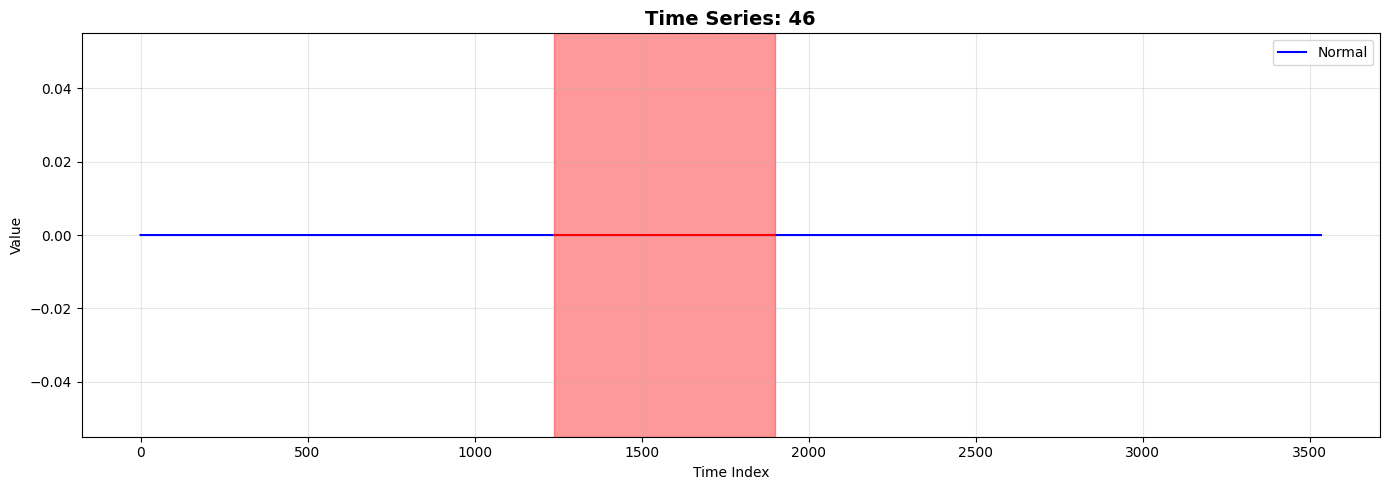

✓ Column: 46 | Shape: (3535,) | Anomalies: 228


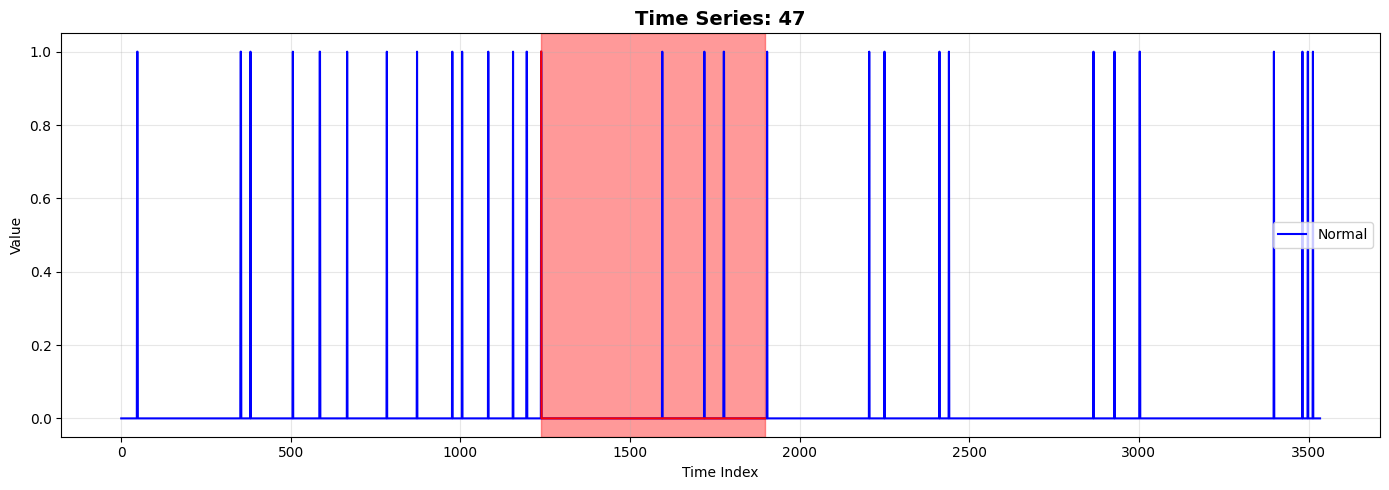

✓ Column: 47 | Shape: (3535,) | Anomalies: 228


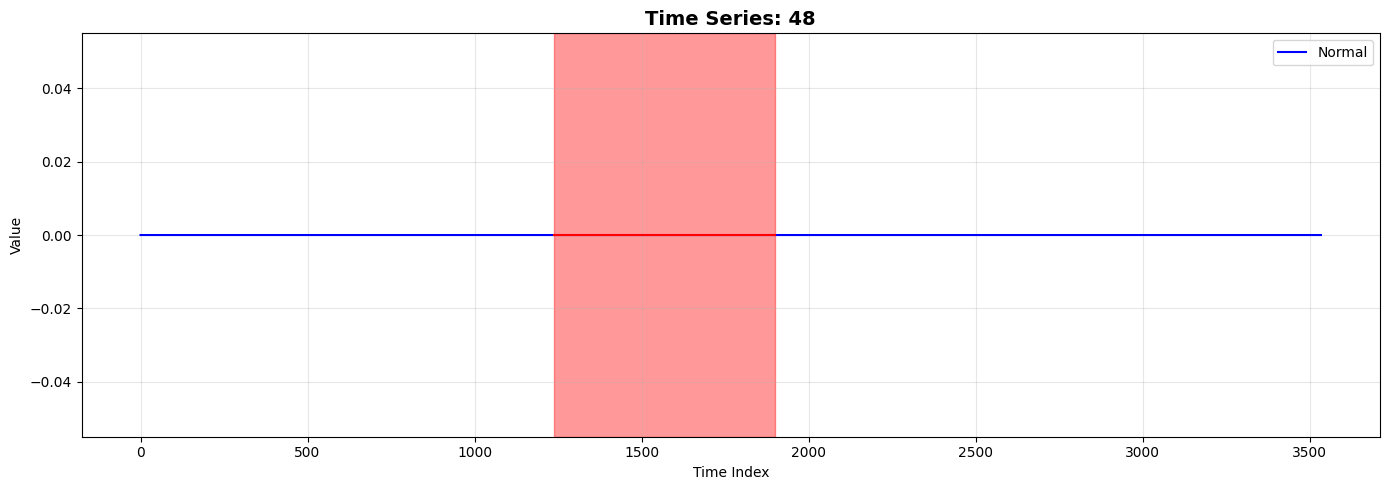

✓ Column: 48 | Shape: (3535,) | Anomalies: 228


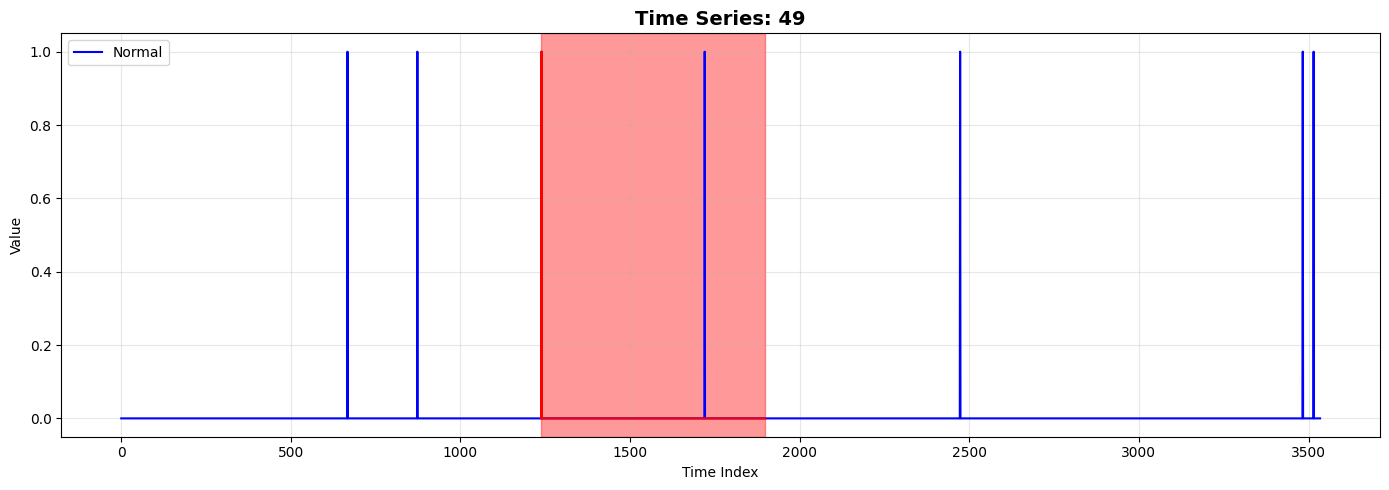

✓ Column: 49 | Shape: (3535,) | Anomalies: 228


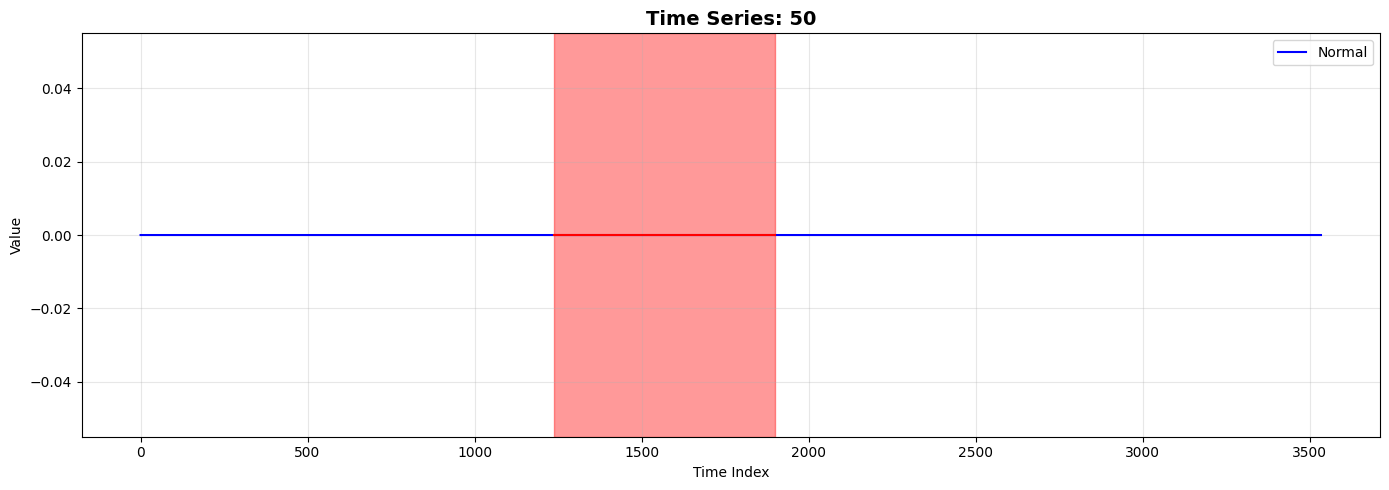

✓ Column: 50 | Shape: (3535,) | Anomalies: 228


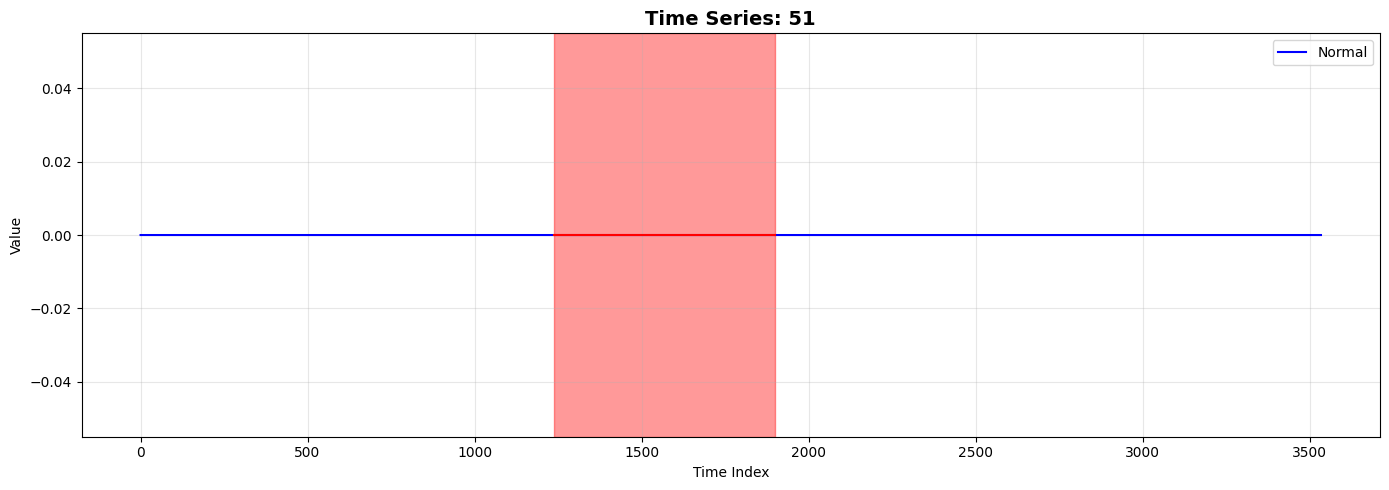

✓ Column: 51 | Shape: (3535,) | Anomalies: 228


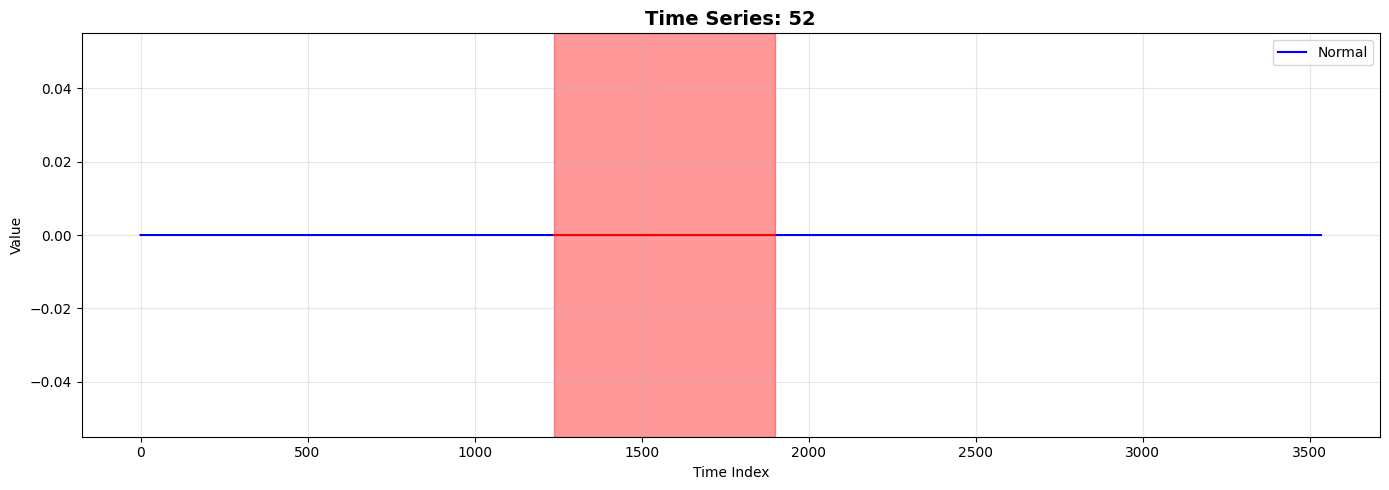

✓ Column: 52 | Shape: (3535,) | Anomalies: 228


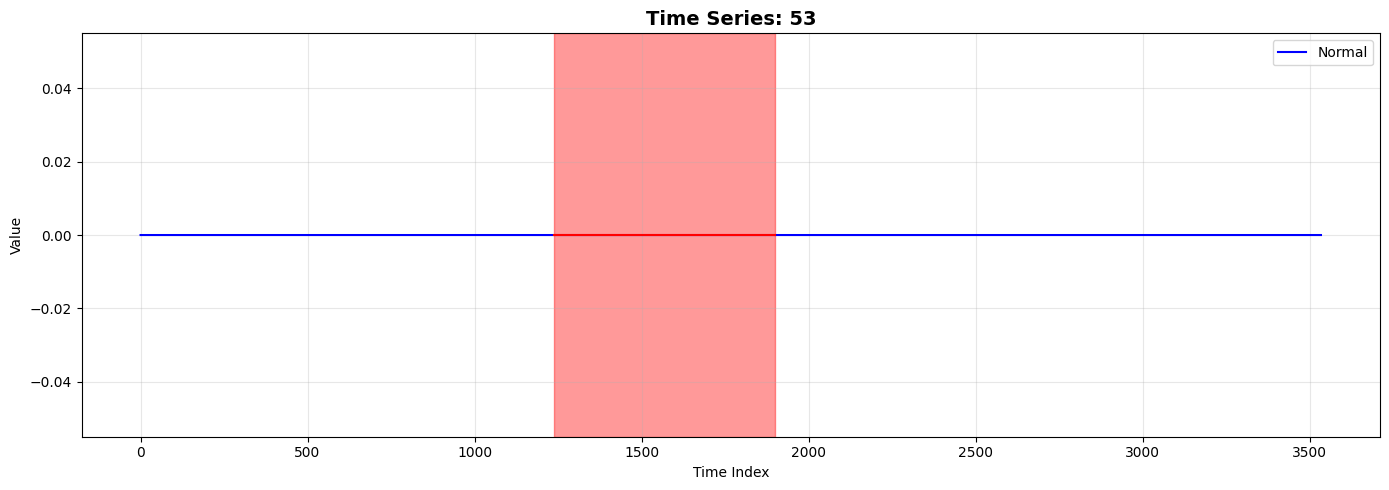

✓ Column: 53 | Shape: (3535,) | Anomalies: 228


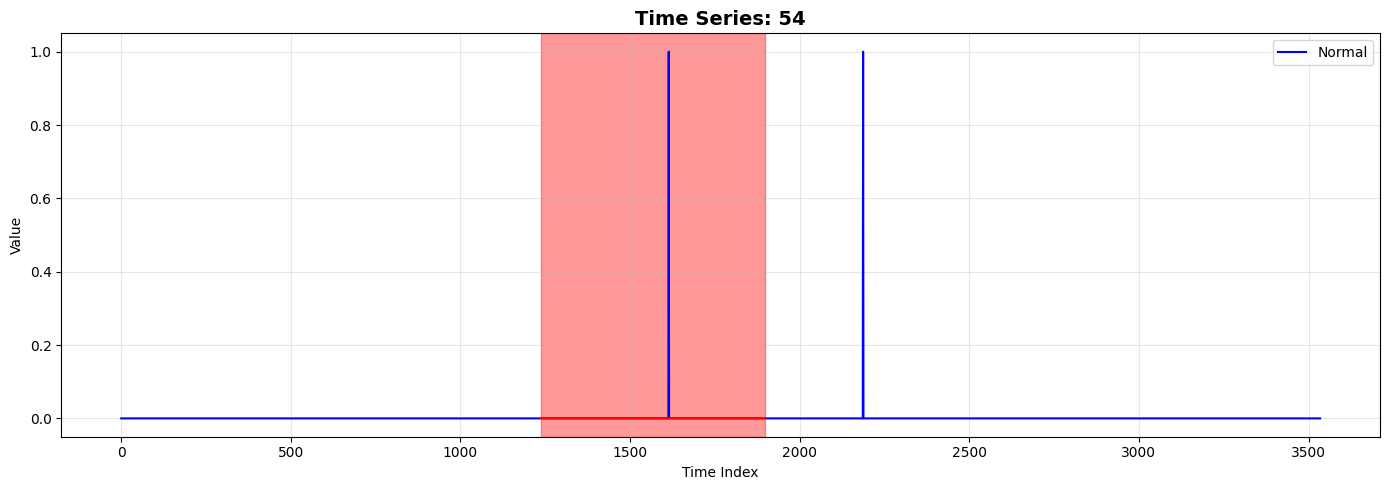

✓ Column: 54 | Shape: (3535,) | Anomalies: 228


In [16]:
def plot_timeseries(index=0):
    # Visualize time series with anomalies highlighted

    test_df = datasets[index]
    columns_to_plot = test_df.columns[:-1]  # Exclude Label column

    for column in columns_to_plot:
        plt.figure(figsize=(14, 5))
        
        # Get values and labels
        values = test_df[column].values
        labels = test_df['Label'].values
        
        # Plot normal points
        normal_idx = np.where(labels== 0)[0]
        anomaly_idx = np.where(labels == 1)[0]
        plt.plot(values, 'b-', label='Normal', linewidth=1.5)
        plt.axvspan(anomaly_idx[0], anomaly_idx[-1], color = 'red', alpha = 0.4)
        plt.plot(anomaly_idx, values[anomaly_idx], color = 'red')
        plt.title(f"Time Series: {column}", fontsize=14, fontweight='bold')
        plt.xlabel("Time Index")
        plt.ylabel("Value")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print(f"✓ Column: {column} | Shape: {values.shape} | Anomalies: {(labels == 1).sum()}")
plot_timeseries(index=2)

In [17]:
def add_to_context(pred_df, targets, train, dataset_index):
    """
    Reshape predictions to match train format and concatenate
    """
    pred_reshaped = pred_df.pivot_table(
        index='timestamp',
        columns='target_name',
        values='0.5',  # Use median (0.5 quantile)
        aggfunc='first'
    )

    # Add back item_id
    pred_reshaped['item_id'] = dataset_index
    pred_reshaped = pred_reshaped.reset_index()

    # Get actual columns (excluding timestamp and item_id)
    pred_columns = [col for col in pred_reshaped.columns if col not in ['timestamp', 'item_id']]
    
    # Reorder: timestamp, item_id, then all target columns
    column_order = ['timestamp', 'item_id'] + pred_columns
    pred_reshaped = pred_reshaped[column_order]
    
    # print(f"Pred columns: {pred_columns}")
    # print(f"Train columns: {train.columns.tolist()}")
    # print(f"Pred shape: {pred_reshaped.shape}, Train shape: {train.shape}")
    # return pred_reshaped.copy()
    return pd.concat([train, pred_reshaped], ignore_index=True).copy()

In [ ]:
# Chronos 2 for Anomaly Detection via Forecasting Residuals
train_proportion = 0.15
 
# Load a dataset
dataset_index = 0
working = pd.DataFrame(datasets[dataset_index].copy())
start_date = "2020-01-01 00:00:00"
# Chronos needs a timestamp, generate a synthetic one 
working['timestamp'] = pd.date_range(
    start=start_date, 
    periods=len(working), 
    freq='T'  
)

working['item_id'] = dataset_index

train = working.iloc[0:int(working.shape[0]*train_proportion)].copy()
test = working[int(working.shape[0]*train_proportion):].copy()
true_labels = test['Label'].values

test.drop(columns='Label', inplace=True)
train.drop(columns='Label', inplace=True)
working.drop(columns='Label', inplace= True)

print(f"Dataset shape: {working.shape}")
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

# Initialize Chronos 2 pipeline
pipeline = BaseChronosPipeline.from_pretrained("amazon/chronos-2", device_map="cuda")

targets = list(set(train.columns) - {'timestamp', 'item_id'})
print(f"Targets: {targets}")

# Number of predictions to keep as context
n_context = 30
max_prediction_length = 100

#If setted to True, uses the real values to extend the context window, if False uses only predictions
USE_REAL_VAL = True
window_size = working.shape[0]*train_proportion
Cumulative_number_of_preds = 0
test_size = test.shape[0]
all_predictions = []
current_train = train.copy()

print(f"\nPredicting {test_size} samples in chunks of {max_prediction_length}...")

for chunk_idx in range(0, test_size, max_prediction_length):
    chunk_end = min(chunk_idx + max_prediction_length, test_size)
    chunk_size = chunk_end - chunk_idx
    
    print(f"Chunk {chunk_idx//max_prediction_length + 1}: Predicting {chunk_size} samples...")
    
    # Make predictions for this chunk
    pred_df = pipeline.predict_df(
        df=current_train,
        target=targets,
        prediction_length=chunk_size,
        cross_learning=False,
        batch_size=len(targets),
        quantile_levels=[0.01, 0.1, 0.5, 0.8, 0.9, 0.99],
        
    )
    
    all_predictions.append(pred_df)
    
    # Add predictions to training context for next chunk
    pred_reshaped = pred_df.pivot_table(
        index='timestamp',
        columns='target_name',
        values='0.5',
        aggfunc='first'
    )
    pred_reshaped['item_id'] = dataset_index
    pred_reshaped = pred_reshaped.reset_index()
    
    # Ensure all target columns exist
    for target in targets:
        if target not in pred_reshaped.columns:
            pred_reshaped[target] = np.nan
    
    pred_reshaped = pred_reshaped[current_train.columns]
    
    # if i enlarge the window i obtain owfull results.
    # current_train = pd.concat([current_train, pred_reshaped], ignore_index=True)
    
    Cumulative_number_of_preds += pred_reshaped.shape[0]
    
    if USE_REAL_VAL:
       start_idx = int(Cumulative_number_of_preds)
       end_idx =int(Cumulative_number_of_preds+window_size)
       current_train = working.iloc[start_idx:end_idx]
       print("current train shape", current_train.shape)
        
    else:
        #give a smaller sliding window as context, 
        if current_train.shape[0] <= max_prediction_length* n_context:
            current_train = pd.concat([current_train, pred_reshaped], ignore_index=True).copy()
            print("current train shape",current_train.shape)
        else: 
            #i remove the oldest and ad the new context
            current_train =pd.concat([current_train.iloc[max_prediction_length:], pred_reshaped], ignore_index=True).copy()
            print("current train shape",current_train.shape)

# Combine all predictions
final_pred = pd.concat(all_predictions, ignore_index=True)

print(f"Final predictions shape: {final_pred.shape}")
final_pred.head()

C:\Users\aleky\AppData\Local\Temp\ipykernel_35768\2876219244.py:9: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  working['timestamp'] = pd.date_range(


Dataset shape: (1827, 57)
Train shape: (274, 57)
Test shape: (1553, 57)
Targets: ['51', '46', '49', '53', '0', '29', '16', '10', '45', '50', '42', '22', '33', '23', '20', '26', '3', '8', '13', '19', '32', '48', '4', '9', '21', '25', '36', '27', '14', '28', '12', '54', '47', '6', '37', '31', '24', '41', '39', '7', '11', '30', '44', '5', '52', '35', '1', '38', '17', '40', '43', '15', '34', '2', '18']

Predicting 1553 samples in chunks of 100...
Chunk 1: Predicting 100 samples...
current train shape (274, 57)
Chunk 2: Predicting 100 samples...
current train shape (274, 57)
Chunk 3: Predicting 100 samples...
current train shape (274, 57)
Chunk 4: Predicting 100 samples...
current train shape (274, 57)
Chunk 5: Predicting 100 samples...
current train shape (274, 57)
Chunk 6: Predicting 100 samples...
current train shape (274, 57)
Chunk 7: Predicting 100 samples...
current train shape (274, 57)
Chunk 8: Predicting 100 samples...
current train shape (274, 57)
Chunk 9: Predicting 100 samples..

,item_id,timestamp,target_name,predictions,0.01,0.1,0.5,0.8,0.9,0.99
0,1,2020-01-01 04:34:00,51,1.850240e-09,-5.871553e-08,-5.151026e-09,1.850240e-09,3.822465e-09,1.132444e-08,8.390425e-08
1,1,2020-01-01 04:35:00,51,2.957322e-10,-6.448436e-08,-4.088506e-09,2.957322e-10,2.290569e-09,1.014646e-08,7.310191e-08
2,1,2020-01-01 04:36:00,51,6.016437e-10,-6.865514e-08,-3.148909e-09,6.016437e-10,1.671910e-09,9.241524e-09,9.333839e-08
3,1,2020-01-01 04:37:00,51,2.021002e-09,-5.953112e-08,-5.909531e-09,2.021002e-09,4.441887e-09,1.228763e-08,7.912599e-08
4,1,2020-01-01 04:38:00,51,2.391203e-09,-6.944101e-08,-7.363202e-09,2.391203e-09,3.777039e-09,1.778833e-08,9.437022e-08


In [52]:
test.shape

(13787, 20)

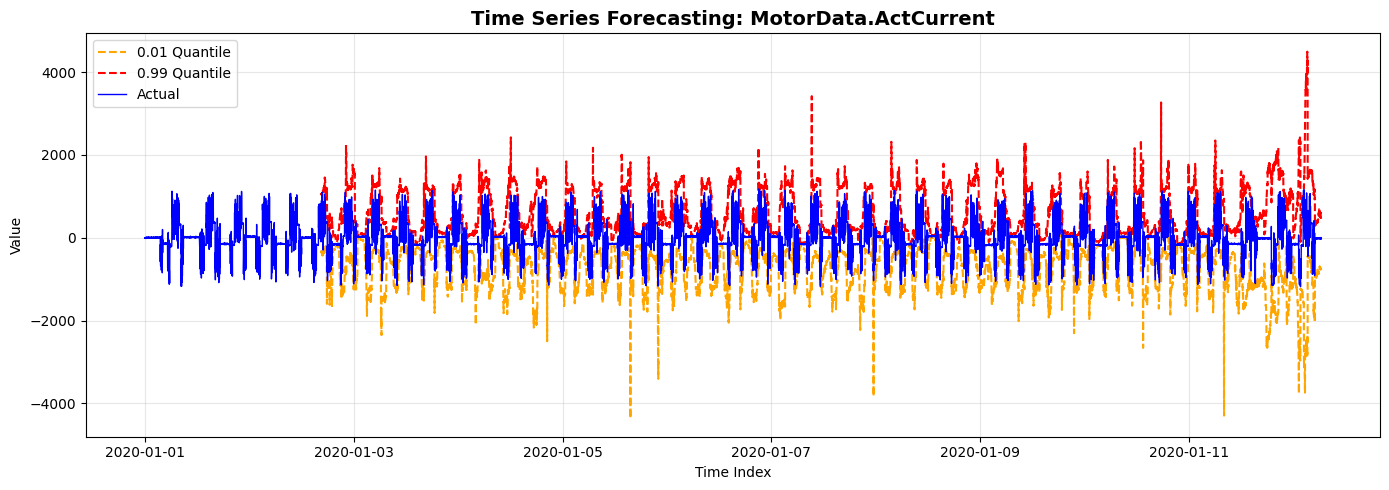

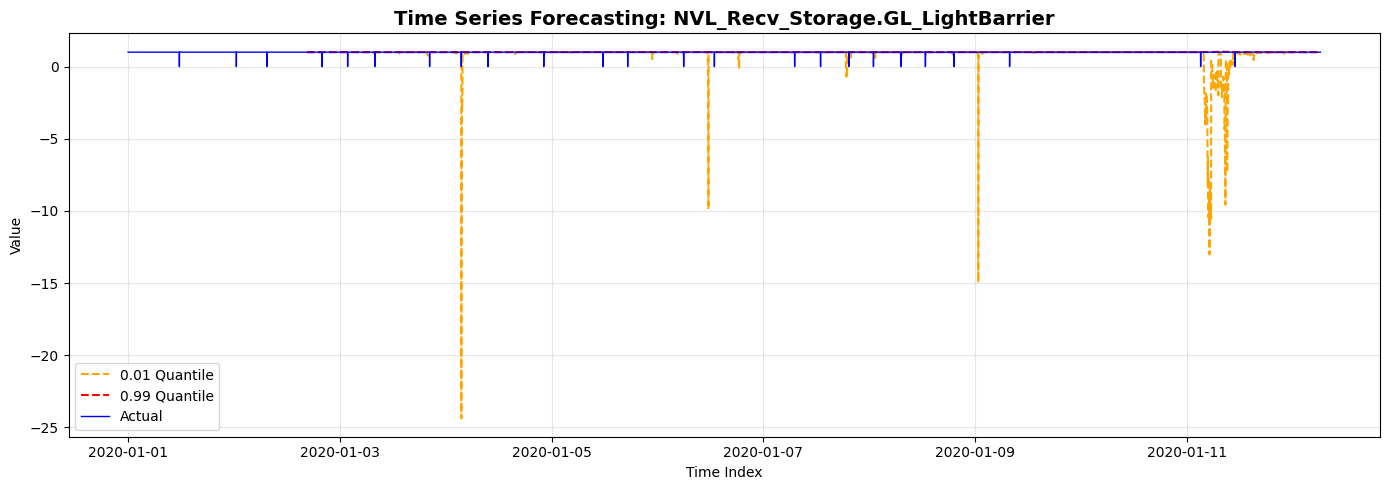

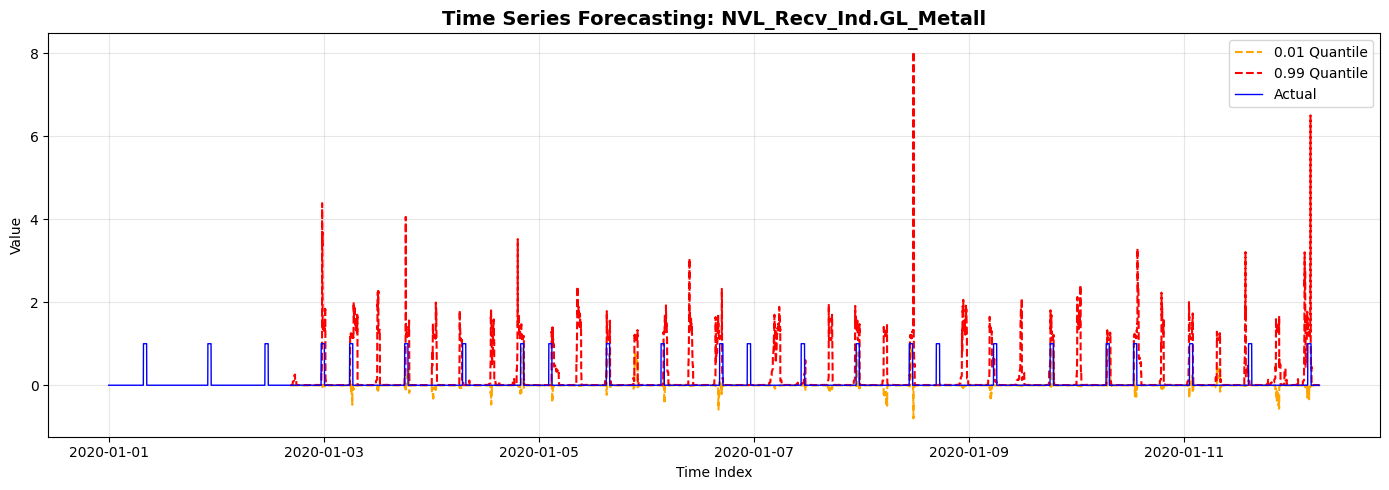

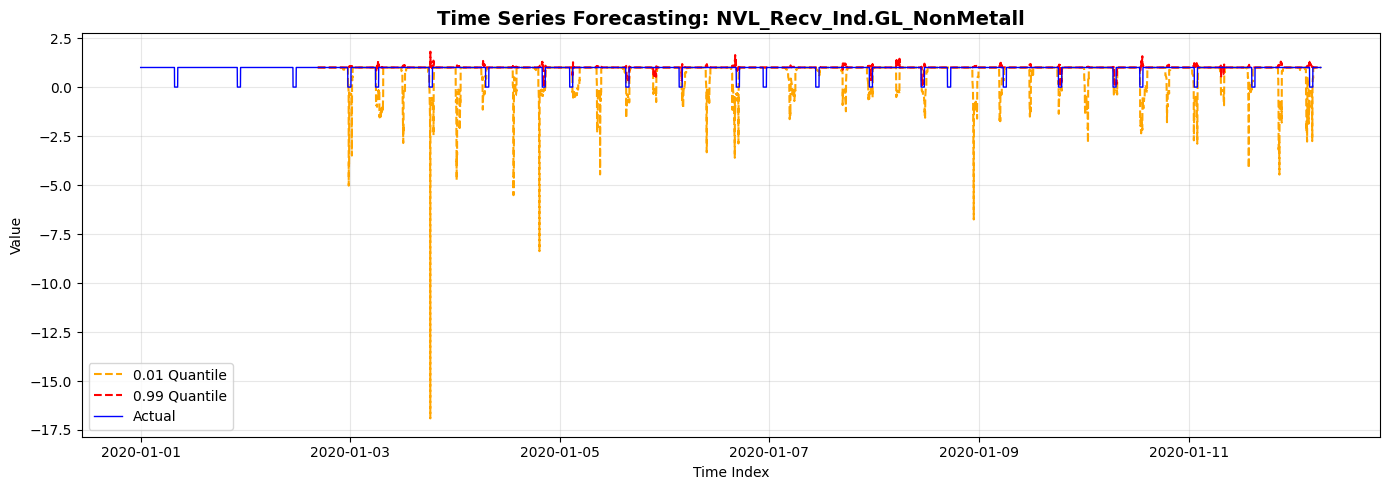

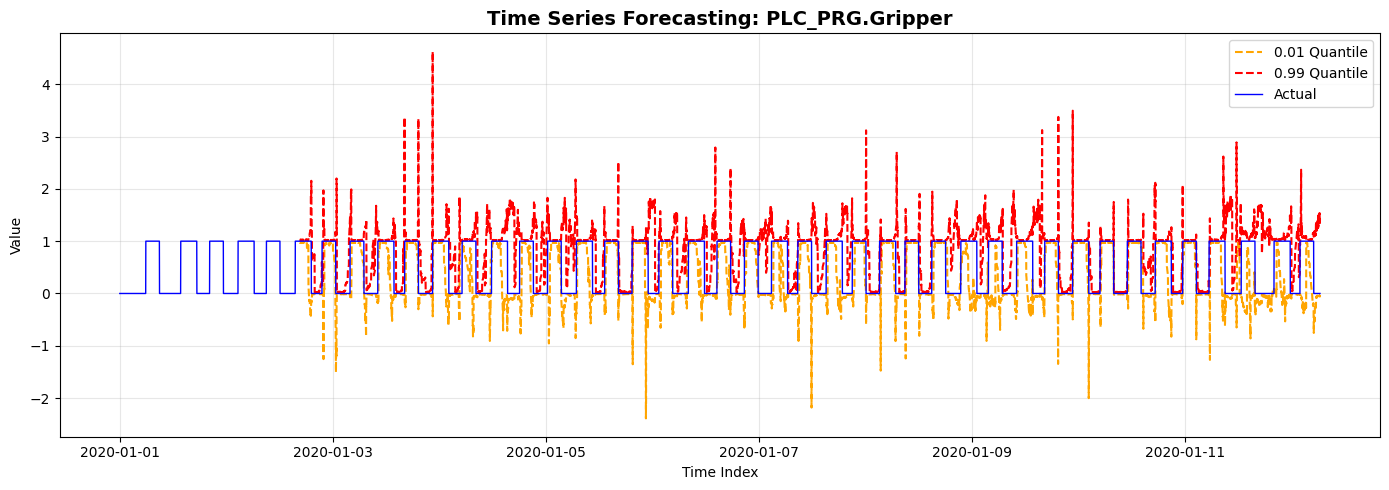

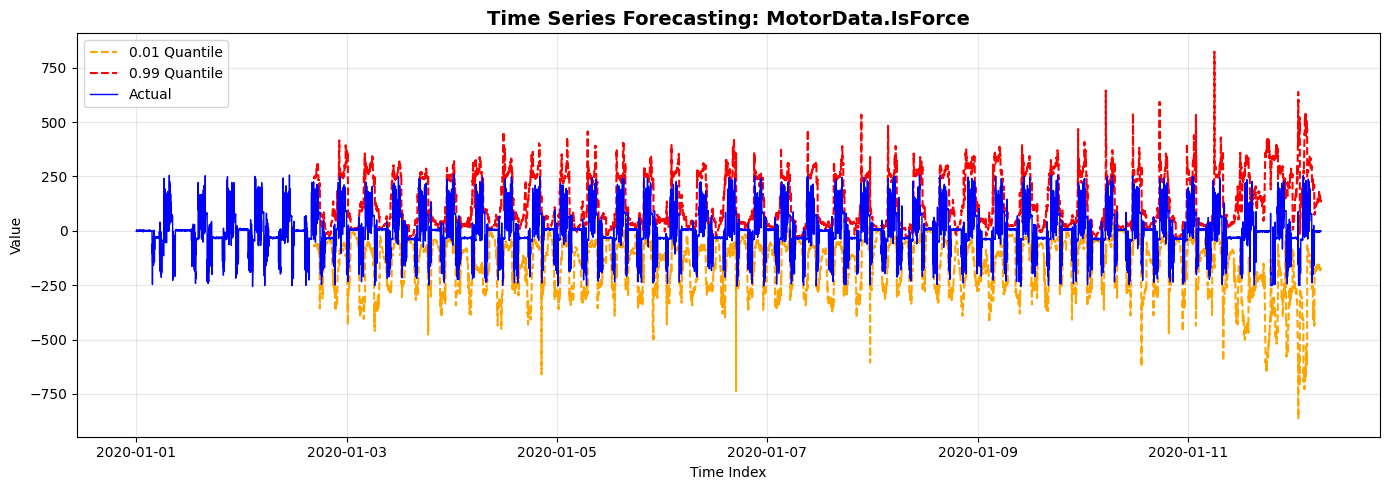

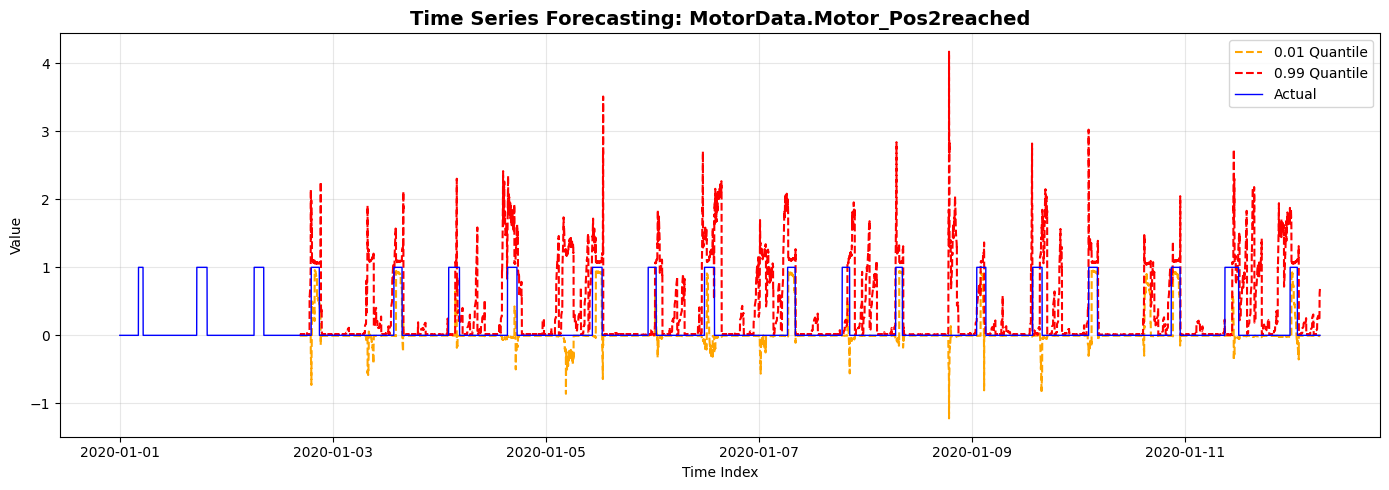

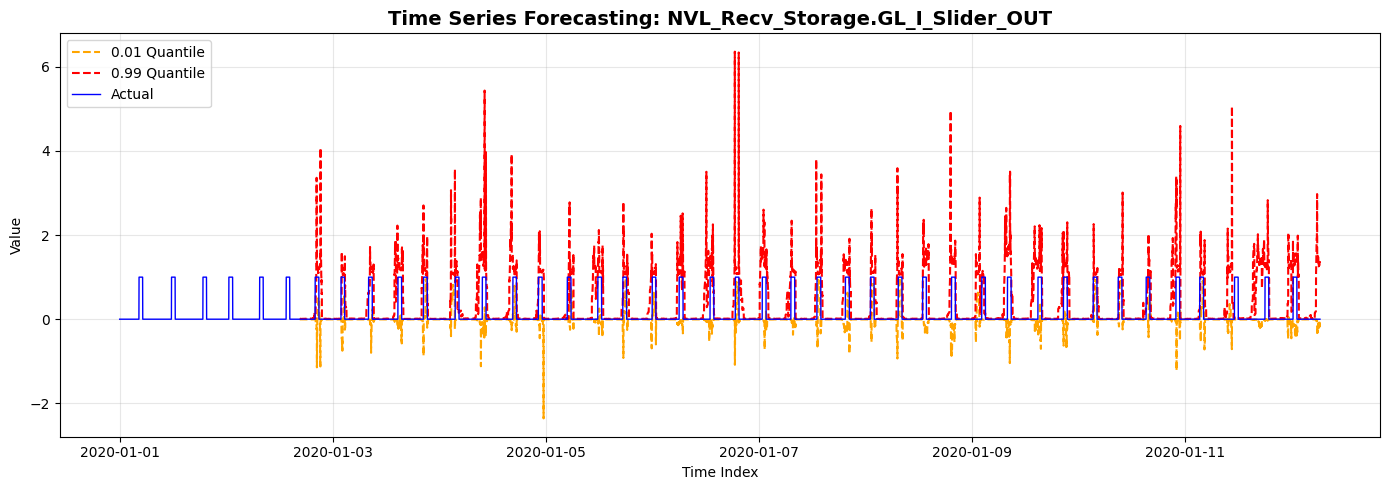

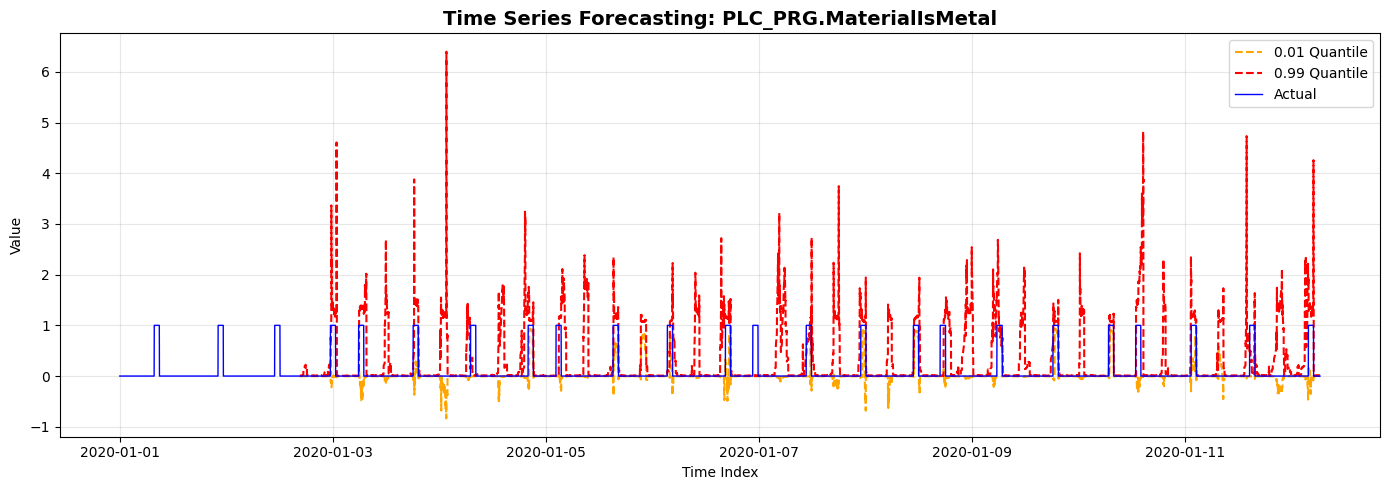

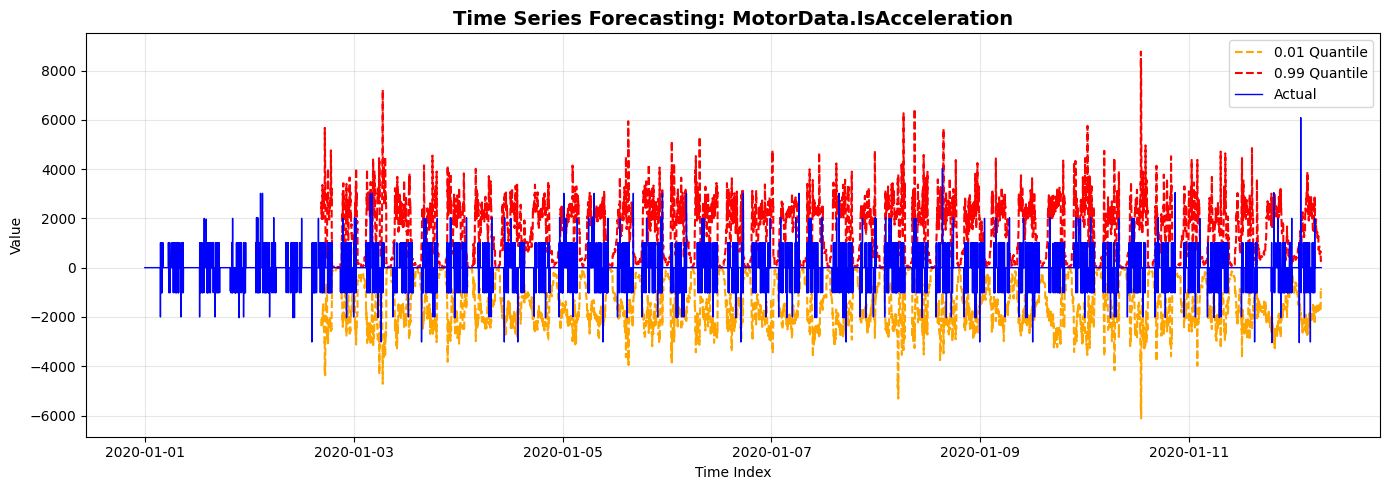

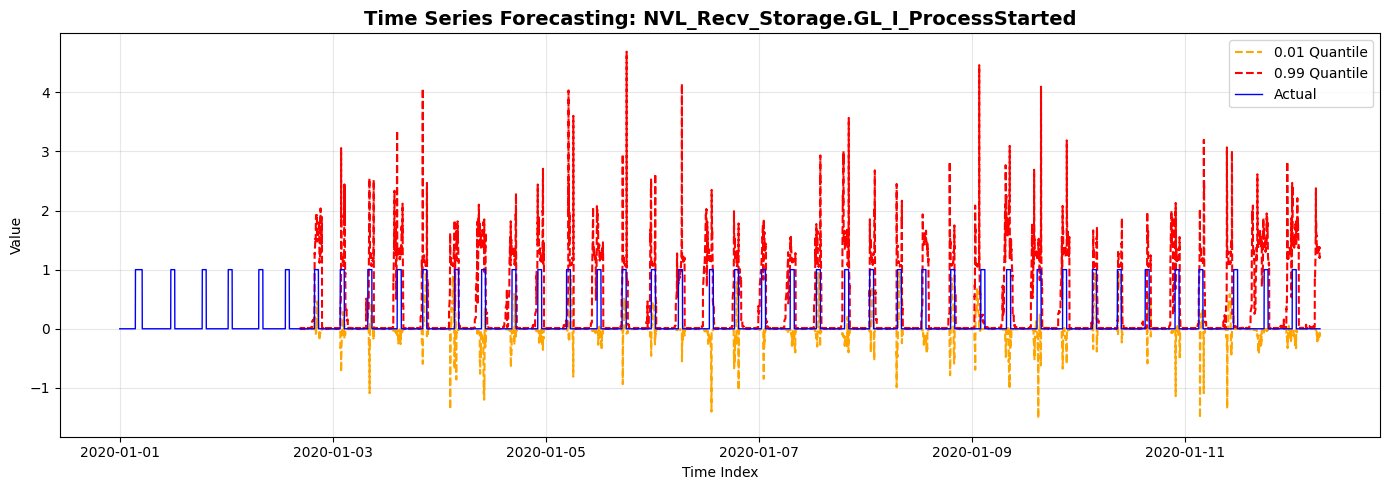

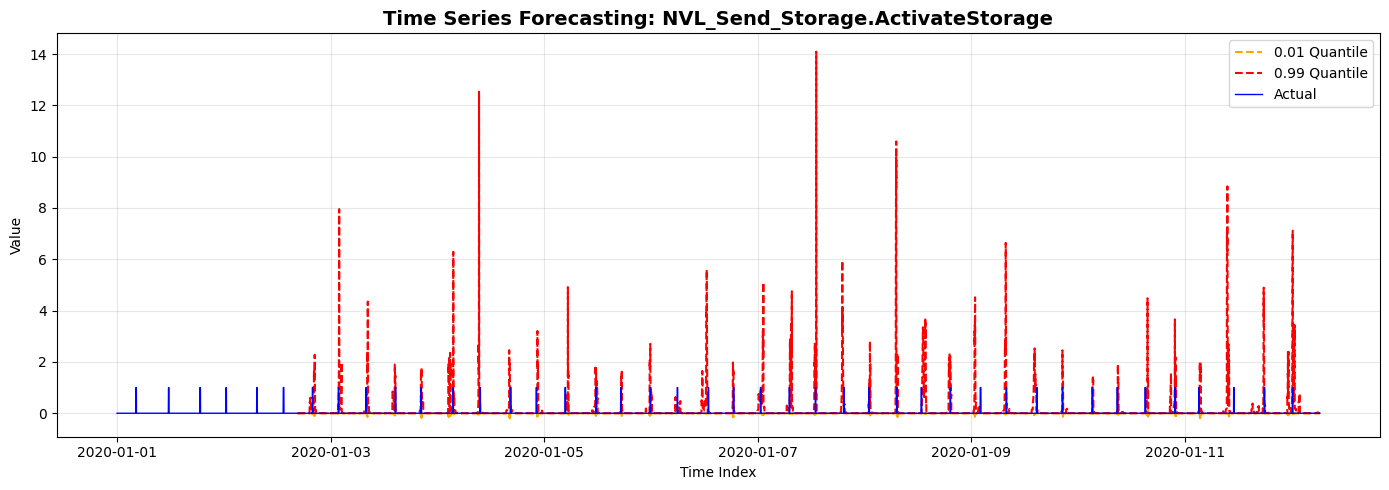

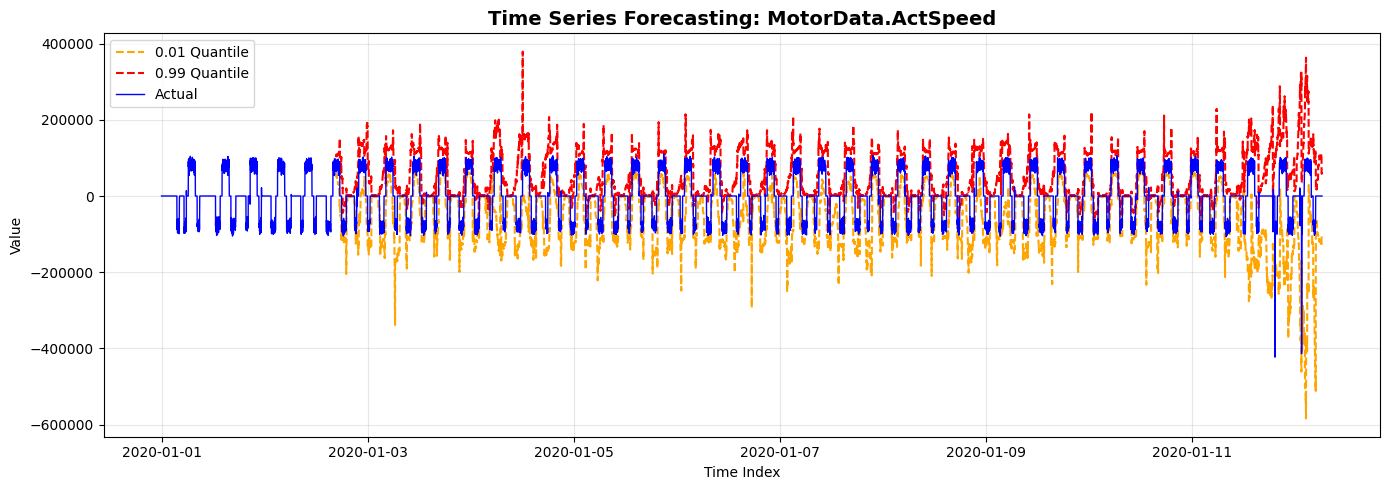

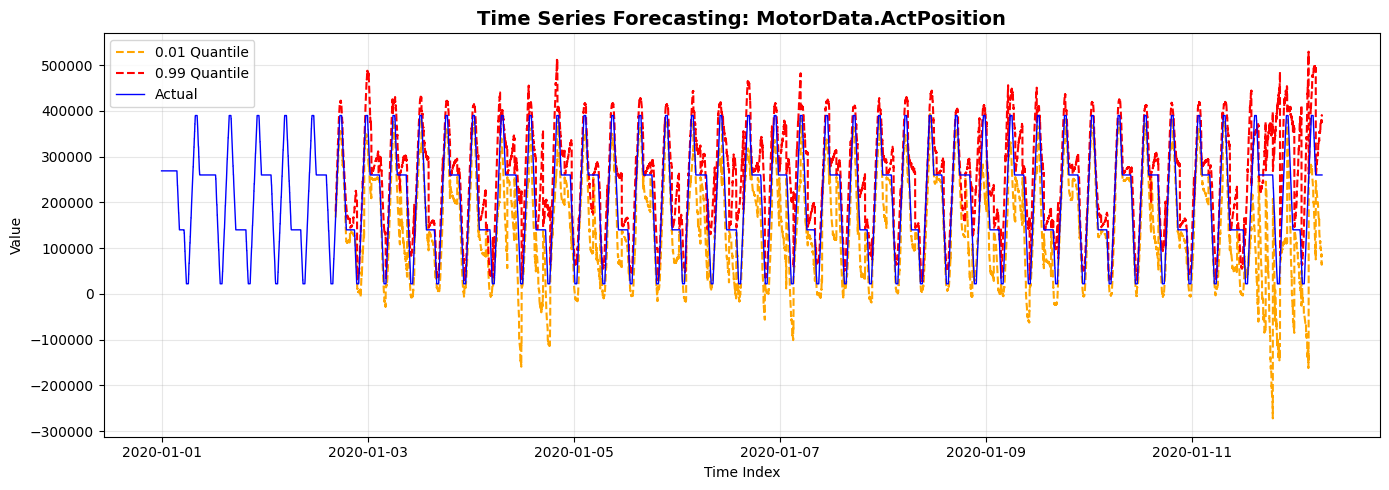

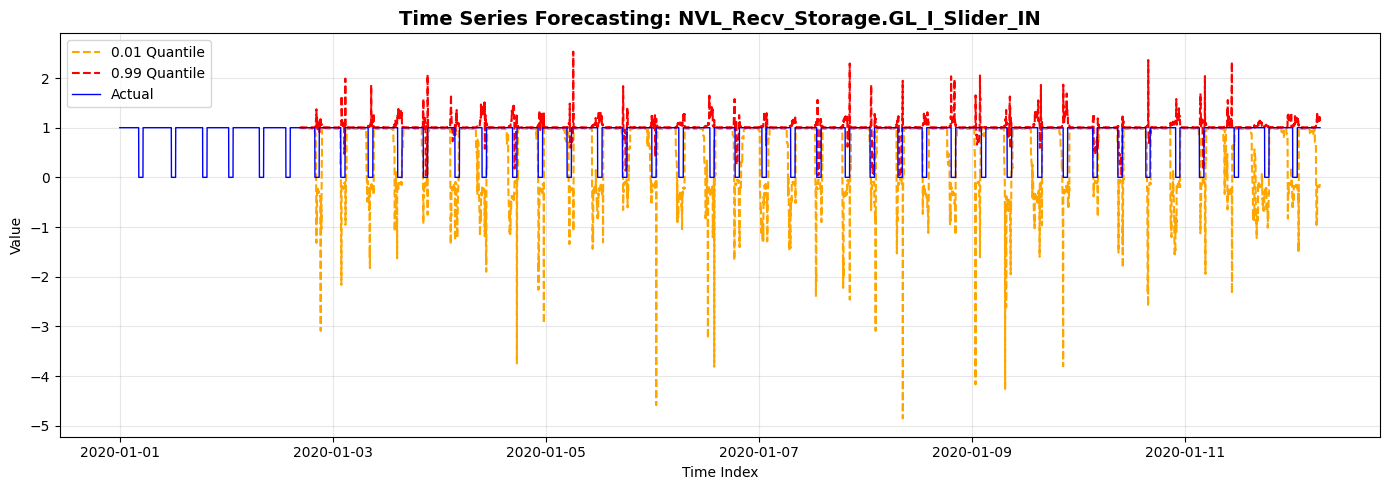

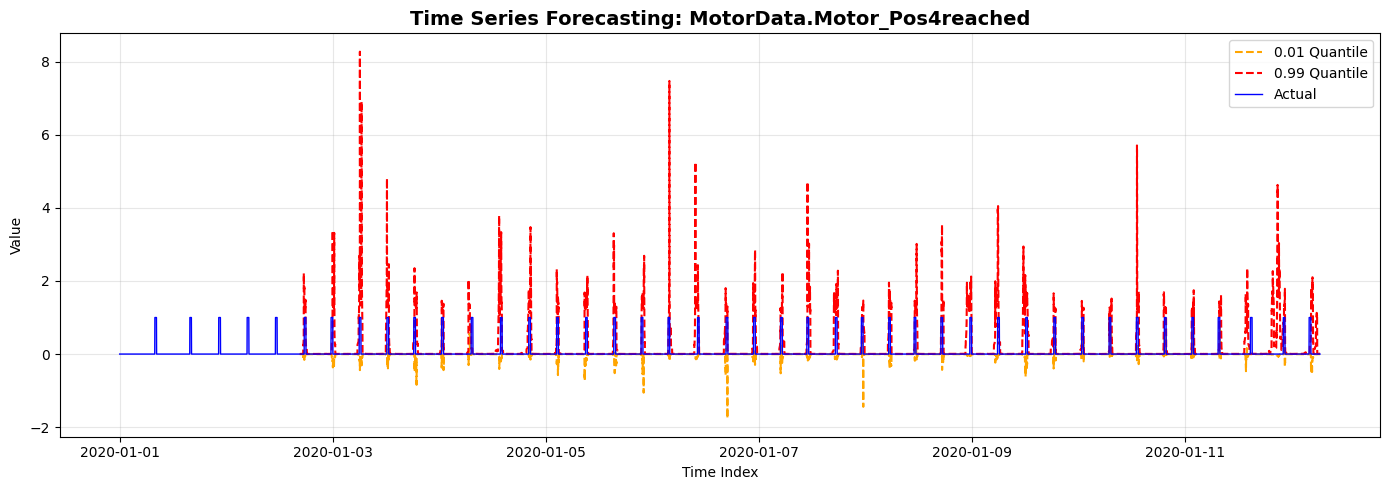

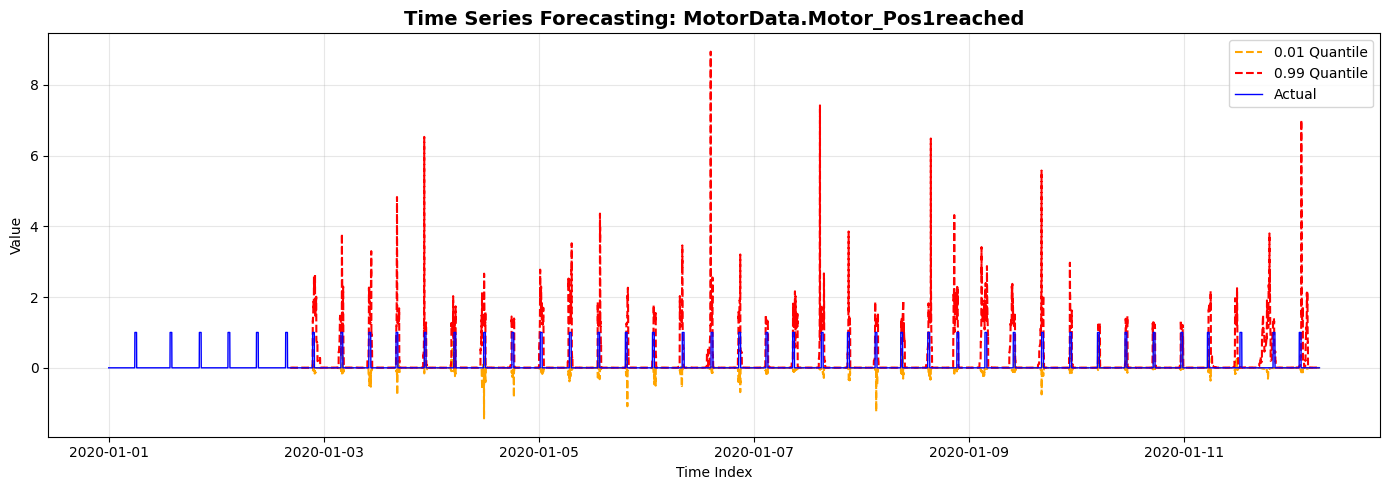

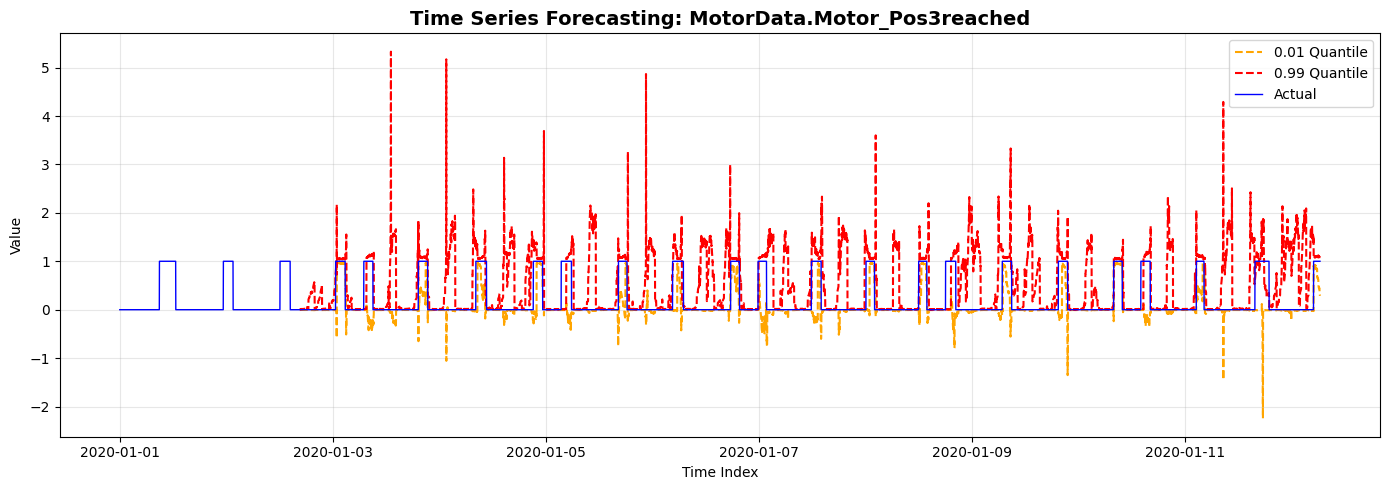

In [75]:
for columns in targets:
    plt.figure(figsize=(14, 5))    
    series = final_pred[final_pred['target_name'] == columns]
    plt.plot(series['timestamp'], series['0.01'], color='orange', label='0.01 Quantile', linestyle='--')
    plt.plot(series['timestamp'], series['0.99'], color='red', label='0.99 Quantile', linestyle='--')
    plt.plot(working['timestamp'], working[columns], color='blue', label='Actual', linewidth=1)
    plt.title(f"Time Series Forecasting: {columns}", fontsize=14, fontweight='bold')
    plt.xlabel("Time Index")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()